<a href="https://colab.research.google.com/github/SUDHANSHU4497/Seoul-Bike-Sharing-Demand-Prediction/blob/main/bike_sharing_demand_prediction_SUDHANSHU_KUMAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing important library for Data wrangling, EDA and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
#load the seol bike data set from drive
df=pd.read_csv('/content/drive/MyDrive/almabetter/BIKE SHARING DEMAND PREDICTION/SeoulBikeData.csv',encoding ='unicode_escape')

In [5]:
bike_df=df.copy()

In [6]:
# Previewing total number of row and columns in data set
bike_df.shape
print(f'our dataset have {bike_df.shape[0]} rows and {bike_df.shape[1]} features')

our dataset have 8760 rows and 14 features


In [ ]:
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [7]:
columns=list(bike_df.columns)

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* Our dataset have 14 columns

* All the columns have 8760 non null data means no missing value

* Data columns have wrong data type






In [ ]:
# previewing duplicate items
bike_df_duplicate_rows=bike_df[bike_df.duplicated()]
print("no of duplicate rows :", bike_df_duplicate_rows.shape[0])


no of duplicate rows : 0


* Data set have no duplicate rows

In [ ]:
# sorting null items
bike_df.isnull().sum().sort_values(ascending=False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* As aspected, Dataset have no null data

In [ ]:
# correcting date datatype
# bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')
bike_df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

* date datatype is changed.
* memory uses also reduces

In [ ]:
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
bike_df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
bike_df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
bike_df['Date'].unique()

array(['2017-12-01T00:00:00.000000000', '2017-12-02T00:00:00.000000000',
       '2017-12-03T00:00:00.000000000', '2017-12-04T00:00:00.000000000',
       '2017-12-05T00:00:00.000000000', '2017-12-06T00:00:00.000000000',
       '2017-12-07T00:00:00.000000000', '2017-12-08T00:00:00.000000000',
       '2017-12-09T00:00:00.000000000', '2017-12-10T00:00:00.000000000',
       '2017-12-11T00:00:00.000000000', '2017-12-12T00:00:00.000000000',
       '2017-12-13T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
       '2017-12-15T00:00:00.000000000', '2017-12-16T00:00:00.000000000',
       '2017-12-17T00:00:00.000000000', '2017-12-18T00:00:00.000000000',
       '2017-12-19T00:00:00.000000000', '2017-12-20T00:00:00.000000000',
       '2017-12-21T00:00:00.000000000', '2017-12-22T00:00:00.000000000',
       '2017-12-23T00:00:00.000000000', '2017-12-24T00:00:00.000000000',
       '2017-12-25T00:00:00.000000000', '2017-12-26T00:00:00.000000000',
       '2017-12-27T00:00:00.000000000', '2017-12-28

In [ ]:
# previewing statistical distribution of all columns in data set
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

* hour columns is normally distributed
* rest of the columns have certain percentage of skew.

In [ ]:
# Extracting 'Day','Month' and 'Year' from 'Date' column
bike_df['Year']=bike_df['Date'].dt.year
bike_df['Month']=bike_df['Date'].dt.month_name()
bike_df['Day']=bike_df['Date'].dt.day_name()



In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

* Now, we have created three new columns, i.e. 'Day','Month' and 'Year'.
* here "Year" columns is of integer data types, we have to change it to object data types.

In [ ]:
# Changing int64 to object for 'Year' columns
bike_df['Year']=bike_df['Year'].astype('object')

In [ ]:
# previewing data with all 17 columns
pd.set_option("display.max_columns", None)
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Year     Month     Day  
0             Yes  2017  December  Friday  
1             Yes  2017  December  Friday  
2             Yes  2017  December  Friday  
3             Yes  2017  December  Friday  
4             Yes  2017  December  Friday

In [ ]:
# categorizing numerical and categorical columns
numeric_cols = bike_df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = bike_df.select_dtypes(['object','category']).columns.tolist()

In [ ]:
plt.rcdefaults()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

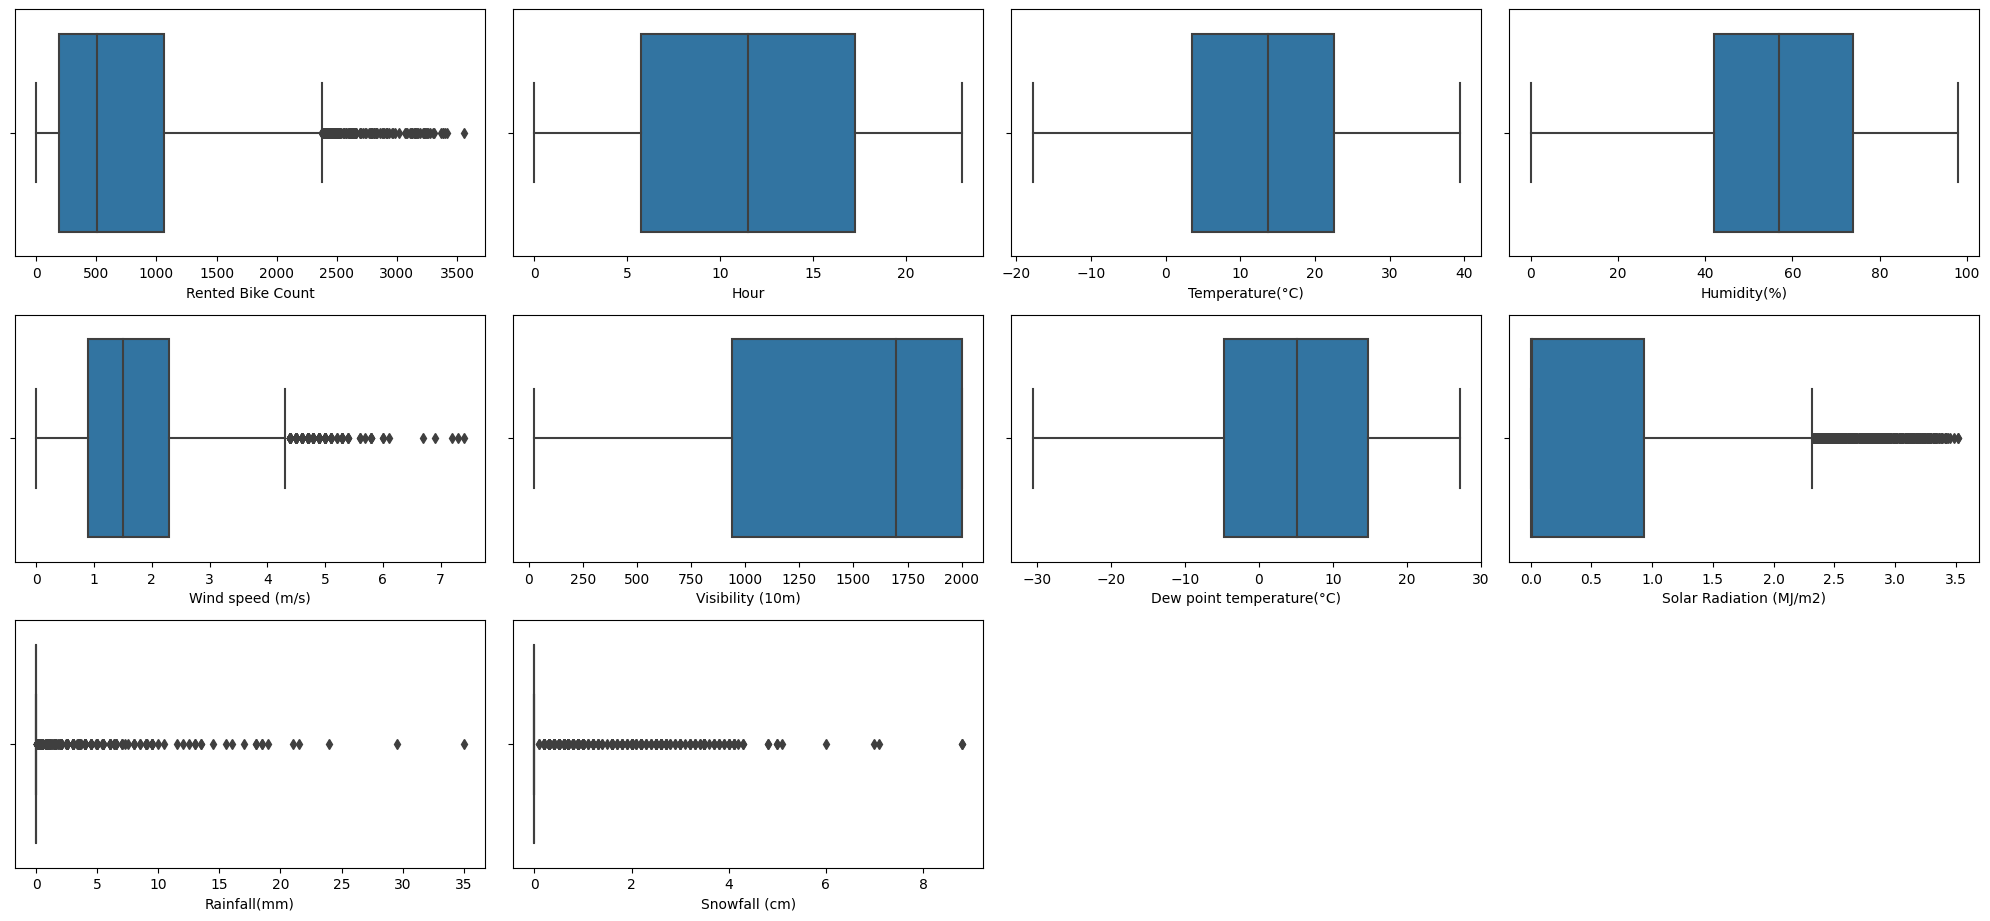

In [ ]:
# outlier detection
# plotting boxplot for numerical columns
n = 1
plt.figure(figsize=(20,15))
for column in numeric_cols:
    plt.subplot(5,4,n)
    n = n+1
    sns.boxplot(bike_df[column])
    plt.tight_layout()
plt.show()

Since we are interested in bike demand data analysis, hence considering functioning day only and considering only those data whose rented bike count greater than zero.

In [ ]:
# bike_df = bike_df.loc[bike_df["Functioning Day"] == "Yes"]
# bike_df = bike_df.loc[bike_df["Rented Bike Count"] != 0]

In [ ]:
bike_df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  Year     Month     Day  
0     No Holiday             Yes  2017  December  Friday  
1     No Holiday             Yes  2017  December  Friday  
2     No Holiday             Yes  2017  December  Friday  
3     No Holiday             Yes  2017  December  Friday  
4     No Holiday             Yes  2017  December  Friday  
...          ...             ...   ...       ...     ...  
8755  No Holiday             Yes  2018  November  Friday  
8756  No Holiday             Yes  2018  November  Friday  
8757  No Holiday             Yes  2018  November  Friday  
8758  No Holiday             Yes  2018  November  Friday  
8759  No Holiday             Yes  2018  November  Friday  

[8760 rows x 17 columns]

In [ ]:
bike_df.shape

(8760, 17)

In [ ]:
# previewing unique value for each columns
for col in bike_df:
    print(f'{col}:\n {bike_df[col].unique()}\n')

Date:
 ['2017-12-01T00:00:00.000000000' '2017-12-02T00:00:00.000000000'
 '2017-12-03T00:00:00.000000000' '2017-12-04T00:00:00.000000000'
 '2017-12-05T00:00:00.000000000' '2017-12-06T00:00:00.000000000'
 '2017-12-07T00:00:00.000000000' '2017-12-08T00:00:00.000000000'
 '2017-12-09T00:00:00.000000000' '2017-12-10T00:00:00.000000000'
 '2017-12-11T00:00:00.000000000' '2017-12-12T00:00:00.000000000'
 '2017-12-13T00:00:00.000000000' '2017-12-14T00:00:00.000000000'
 '2017-12-15T00:00:00.000000000' '2017-12-16T00:00:00.000000000'
 '2017-12-17T00:00:00.000000000' '2017-12-18T00:00:00.000000000'
 '2017-12-19T00:00:00.000000000' '2017-12-20T00:00:00.000000000'
 '2017-12-21T00:00:00.000000000' '2017-12-22T00:00:00.000000000'
 '2017-12-23T00:00:00.000000000' '2017-12-24T00:00:00.000000000'
 '2017-12-25T00:00:00.000000000' '2017-12-26T00:00:00.000000000'
 '2017-12-27T00:00:00.000000000' '2017-12-28T00:00:00.000000000'
 '2017-12-29T00:00:00.000000000' '2017-12-30T00:00:00.000000000'
 '2017-12-31T00:00

In [ ]:
# creating a new feature 'type of day' with two unique value i.e. "weekend" and "weekday"
bike_df['type of day']=bike_df['Day'].apply(lambda x: "weekend" if x=='Saturday' or x=='Sunday' else "weekday")

In [ ]:
type_of_day_df=bike_df.groupby('type of day').sum().reset_index().iloc[:, [0,1]]
type_of_day_df

type of day  Rented Bike Count
0     weekday            4506628
1     weekend            1665686

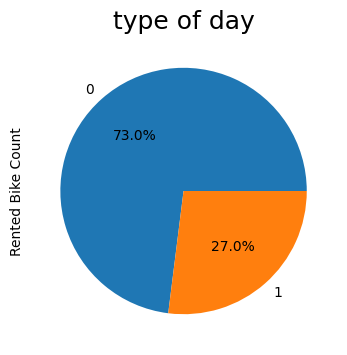

In [ ]:
# setting figure size
plt.figure(figsize=(10,4))

#plotting pie plot
type_of_day_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%')

# setting up title
plt.title('type of day',fontsize=18)
plt.show()

* 73% of bike booked on weekday and remaining 23% are book on weekend
* the possible reason for this is people have compulsion to go their office, hence they book bike so that they reach office on time.
* On weekend people booked bike only for their pending work.

In [ ]:
# Replacing Holiday and No Holiday with Yes and No
label = {'Holiday': {'Holiday': 'Yes', 'No Holiday': 'No'}}
bike_df = bike_df.replace(label)
bike_df.head

<bound method NDFrame.head of            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0         

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# Days between which the data is collected
print('Start date: ',bike_df['Date'].min())
print('End date: ',bike_df['Date'].max())
		
# Number of days for which the data is collected
print('Number of days the data is collected: ',bike_df['Date'].max()-bike_df['Date'].min())

Start date:  2017-12-01 00:00:00
End date:  2018-11-30 00:00:00
Number of days the data is collected:  364 days 00:00:00


data is given for the period of 1 year, hence there is no use of year column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


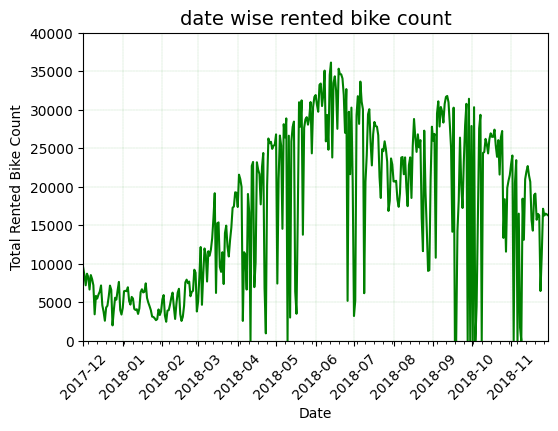

In [ ]:
import matplotlib.dates as md
# creating a new dataframe by_day using groupby statement
by_day = bike_df.groupby(['Date'])['Rented Bike Count'].sum()

# creating subplot
fig, ax1 = plt.subplots(1,1, figsize=(6,4))
sns.lineplot(by_day.index, by_day.values, ax=ax1,color='g')

# setting axes
ax1.xaxis.set_major_locator(md.MonthLocator(bymonthday = 1))
ax1.set_xlim(md.datestr2num(("2017/12/01", "2018/11/30")))
ax1.set_ylim((0, 40000))
ax1.xaxis.set_minor_locator(md.WeekdayLocator(byweekday = 1))
ax1.grid(b=True, which='minor', color='white', lw=0.5)
plt.xticks(rotation=45)


# setting up title
plt.title('date wise rented bike count',fontsize=14)

# setting up x and y label
plt.xlabel("Date")
plt.ylabel("Total Rented Bike Count")

# enable grid
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)
plt.show()

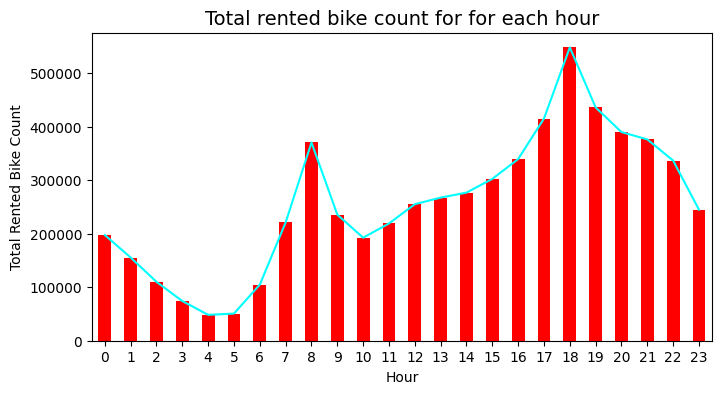

In [ ]:
# setting figure size
plt.figure(figsize=(8,4))

#plotting 
bike_df.groupby('Hour').sum()['Rented Bike Count'].plot.bar(color='r')
bike_df.groupby('Hour').sum()['Rented Bike Count'].plot(color='cyan')

# setting up title
plt.title('Total rented bike count for for each hour',fontsize=14)

# setting up x and y label
plt.xlabel("Hour")
plt.ylabel("Total Rented Bike Count")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


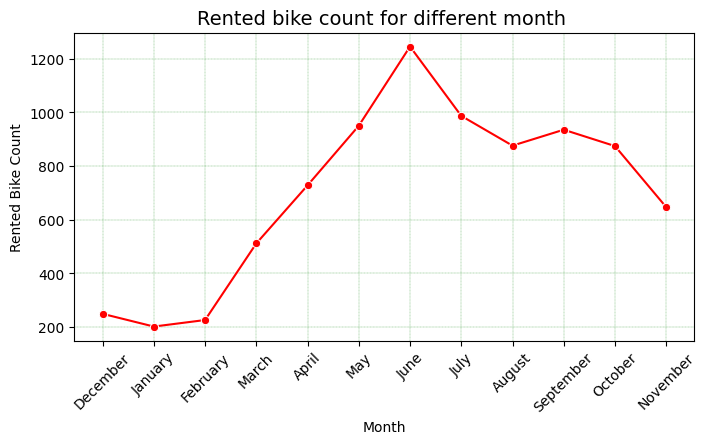

In [ ]:
# setting figure size
plt.figure(figsize=(8,4))

# reindexing
reindex = ['December','January', 'February','March','April','May','June','July','August','September','October','November']
bike_df['Month'] = pd.Categorical(bike_df['Month'],categories=reindex,ordered=True)

# plotting line plot
sns.lineplot('Month','Rented Bike Count',data=bike_df,ci=None,marker='o',color='r' )

# setting up title
plt.title('Rented bike count for different month ',fontsize=14)

# setting up x and y label
plt.ylabel("Rented Bike Count")
plt.xlabel("Month")
plt.xticks(rotation=45)

plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)
plt.show()

* june month have maximum number of bike count
* january have least number of booking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


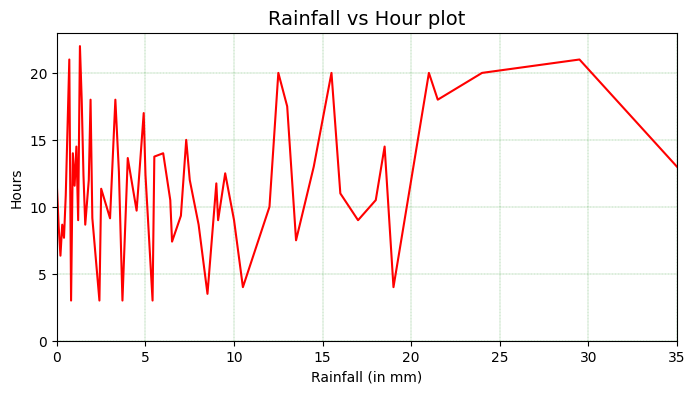

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
sns.lineplot('Rainfall(mm)','Hour',data=bike_df,ci=None ,color='r')
ax.set_ylim((0, 23))
ax.set_xlim((0, 35))

# setting up title
plt.title('Rainfall vs Hour plot',fontsize=14)

# setting up x and y label
plt.xlabel("Rainfall (in mm)")
plt.ylabel("Hours")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)
plt.xlim
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


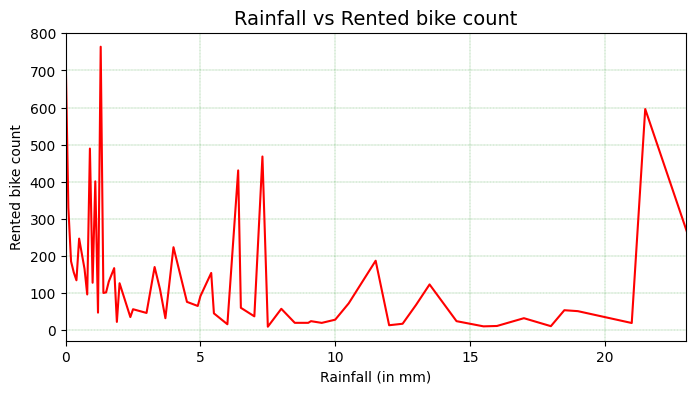

In [ ]:
# setting figure size
plt.figure(figsize=(8,4))

sns.lineplot('Rainfall(mm)','Rented Bike Count',data=bike_df,ci=None,color='r' )

# setting up title
plt.title('Rainfall vs Rented bike count',fontsize=14)

# setting up x and y label
plt.xlabel("Rainfall (in mm)")
plt.xlim((0,23))
plt.ylabel("Rented bike count")

plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


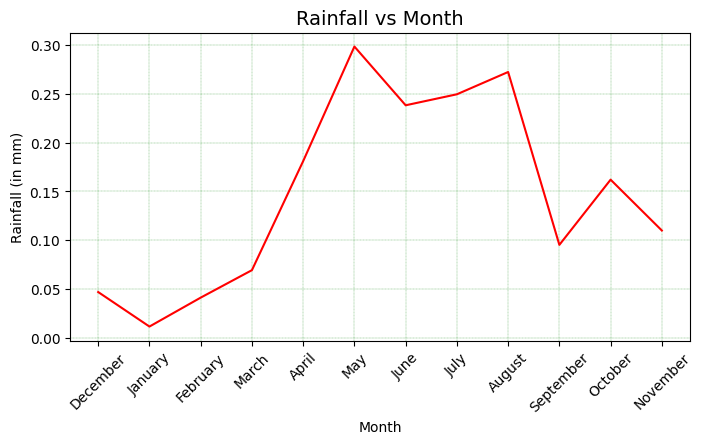

In [ ]:
# setting figure size
plt.figure(figsize=(8,4))

# plotting
sns.lineplot('Month','Rainfall(mm)',data=bike_df,ci=None,color='red' )

plt.xticks(rotation=45)

# setting up title
plt.title('Rainfall vs Month',fontsize=14)

# setting up x and y label
plt.ylabel("Rainfall (in mm)")
plt.xlabel("Month")

plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)
plt.show()

In [ ]:
month_df=bike_df.groupby(['Month']).mean()
month_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
Month                                                              
December          249.099462  11.5        -1.928763    55.825269   
January           201.620968  11.5        -3.943145    48.081989   
February          225.941964  11.5        -1.664732    44.854167   
March             511.551075  11.5         8.044489    59.295699   
April             728.093056  11.5        12.948056    54.611111   
May               950.387097  11.5        18.144355    62.288978   
June             1245.676389  11.5        23.136806    62.618056   
July              987.177419  11.5        27.763978    67.447581   
August            876.192204  11.5        28.736425    64.802419   
September         935.572222  11.5        21.498750    60.700000   
October           874.563172  11.5        13.089113    59.258065   
November          646.826389  11.5         7.809028    57.726389   

           Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
Month                                                                      
December           1.737769       1332.243280                 -10.344489   
January            1.872581       1459.887097                 -13.913844   
February           2.182887       1556.528274                 -13.053274   
March              1.921774       1143.004032                  -0.270699   
April              1.985972       1327.868056                   2.520556   
May                1.719624       1253.044355                  10.058737   
June               1.675833       1244.911111                  14.775972   
July               1.454167       1538.481183                  20.576478   
August             1.700403       1713.559140                  20.769758   
September          1.554028       1816.797222                  12.908194   
October            1.543414       1674.366935                   4.553091   
November           1.385139       1187.305556                  -0.933611   

           Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
Month                                                            
December                  0.203884      0.046774       0.370968  
January                   0.226747      0.011425       0.255376  
February                  0.481667      0.041071       0.102083  
March                     0.600013      0.069220       0.000000  
April                     0.712764      0.180972       0.000000  
May                       0.754355      0.298387       0.000000  
June                      0.836931      0.238194       0.000000  
July                      0.754167      0.249462       0.000000  
August                    0.695108      0.272312       0.000000  
September                 0.654111      0.095139       0.000000  
October                   0.542124      0.161962       0.000000  
November                  0.368542      0.109861       0.170833

In [ ]:
list(bike_df['Month'].unique())

['December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November']

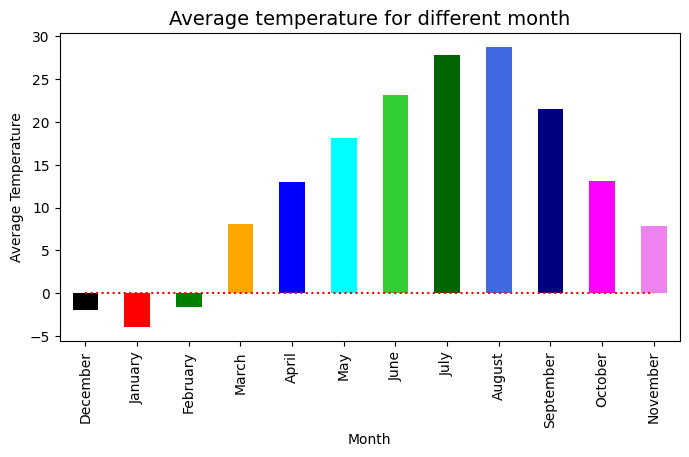

In [ ]:
# setting figure size
plt.figure(figsize=(8,4))

# plotting
color = ['black','red','green','orange','blue','cyan','limegreen','darkgreen','royalblue','navy','magenta','violet']
month_df['Temperature(°C)'].plot(kind='bar', color=color)

# Define Data for refernce line
X = ['December','January','February','March','April','May','June','July','August','September','October','November']
Y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Plot horizontal line
plt.plot(X,Y,color='red', linestyle='dotted')

# setting up title
plt.title('Average temperature for different month',fontsize=14)

# setting up x and y label
plt.xlabel("Month")
plt.ylabel("Average Temperature")

plt.show()

December, January and February having negative mean temperature, this may hamper the rented bike count

In [ ]:
monthdf_df=bike_df.groupby(['Month']).sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'upper leftt'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


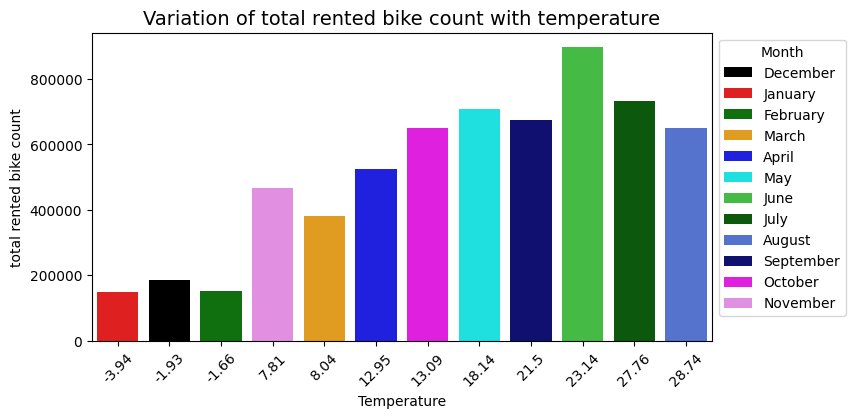

In [ ]:
# setting figure size
plt.figure(figsize=(8,4))

# plotting
color = ['black','red','green','orange','blue','cyan','limegreen','darkgreen','royalblue','navy','magenta','violet']
sns.barplot(x=round(month_df['Temperature(°C)'],2),y=monthdf_df['Rented Bike Count'],hue=month_df.index,dodge=False,palette=color)
plt.xticks(rotation=45)

# setting up title
plt.title('Variation of total rented bike count with temperature',fontsize=14)

# setting up x and y label
plt.xlabel("Temperature")
plt.ylabel("total rented bike count")

# setting up legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper leftt',fontsize=10,title='Month')
plt.show()

from the above plot it is observe that, month which have negative mean temperature having less number of booking.

hence, it can conclude that due to lower temperature people prefer to travel with other medium of transportation isteand of using bike.

In [ ]:
day_df=bike_df.groupby(['Day']).mean()
day_df.reset_index(level=0, inplace=True)
day_df

Day  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     Friday         747.117925  11.5        12.481132    57.003145   
1     Monday         730.563301  11.5        13.049439    58.199519   
2   Saturday         709.528846  11.5        13.037260    56.855769   
3     Sunday         625.155449  11.5        13.001603    58.503205   
4   Thursday         690.704327  11.5        12.605689    60.676282   
5    Tuesday         687.977564  11.5        12.955449    57.408654   
6  Wednesday         740.349359  11.5        13.057612    58.960737   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0          1.704874       1429.331761                   3.361085   
1          1.700000       1408.248397                   4.355689   
2          1.780929       1421.835737                   3.715304   
3          1.595913       1400.240385                   4.143109   
4          1.757933       1416.771635                   4.414423   
5          1.730529       1490.754808                   4.123718   
6          1.804567       1490.741987                   4.417067   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
0                 0.588561      0.106289       0.049292  
1                 0.558285      0.175080       0.058734  
2                 0.631891      0.111138       0.070112  
3                 0.542043      0.135657       0.070673  
4                 0.534623      0.199920       0.068269  
5                 0.547099      0.177083       0.087420  
6                 0.580897      0.136458       0.121474

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


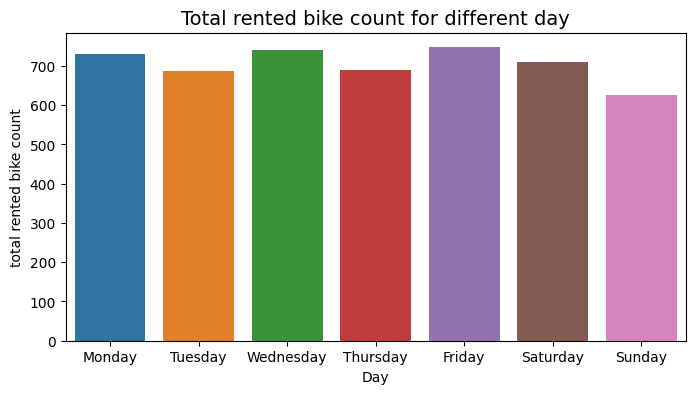

In [ ]:
# setting figure size
fig, ax = plt.subplots(1,1, figsize=(8,4))

# reindexing day 
reindex = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_df['Day'] = pd.Categorical(day_df['Day'],categories=reindex,ordered=True)

# plotting
sns.barplot('Day','Rented Bike Count',data=day_df,ci=None )

# setting up title
plt.title('Total rented bike count for different day',fontsize=14)

# setting up x and y label
plt.xlabel("Day")
plt.ylabel("total rented bike count")

plt.show()

Sunday having very less number of booking

maximum number of booking on friday followed by wednesday and monday

Text(0.5, 1.0, 'Rented bike count for different day')

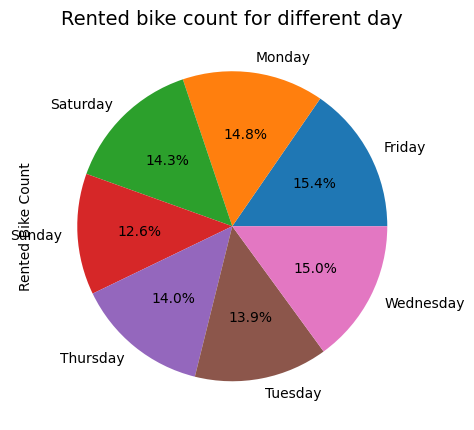

In [ ]:
# setting figure size
plt.figure(figsize=(5,7))

# plotting
bike_df.groupby('Day')['Rented Bike Count'].sum().plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%')

plt.xticks(rotation=45)

# setting up title
plt.title('Rented bike count for different day',fontsize=14)


when we see percentage wise, it is observe that 12.6% of total bike booking on Sunday followed by Tuesday(13.9% ) and Thursday(14%).

In [ ]:
holiday_df=bike_df.groupby('Holiday').sum()#.reset_index().iloc[:,[0,1]]
holiday_df

Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  \
Holiday                                                           
No                 5956419  95772         108556.1       486850   
Yes                 215895   4968           4298.3        23212   

         Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
Holiday                                                                  
No                14319.8          11929228                    35580.4   
Yes                 790.4            657366                      106.2   

         Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
Holiday                                                        
No                       4747.92        1268.8          635.6  
Yes                       237.49          33.7           22.0

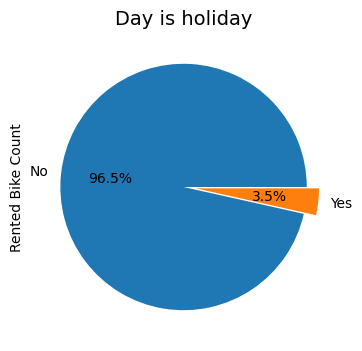

In [ ]:
# setting figure size
plt.figure(figsize=(8,4))

# plotting
holiday_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%',explode=(0,0.1))
plt.title('Day is holiday',fontsize=14)

plt.show()

very less number (3.5 %) of bike are book on holiday, it can be conclude that due to seat limitation, on weekend, people with his family cannot go with bike, they prefered to book some other medium of transport.

In [ ]:
season_df=bike_df.groupby('Seasons').sum() # .reset_index().iloc[:,[0,1]]
season_df

Rented Bike Count   Hour  Temperature(°C)  Humidity(%)  \
Seasons                                                           
Autumn             1790002  25116          30839.9       129355   
Spring             1611909  25392          28807.1       129779   
Summer             2283234  25392          58694.8       143479   
Winter              487169  24840          -5487.4       107449   

         Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
Seasons                                                                  
Autumn             3264.5           3408683                    12009.2   
Spring             4139.1           2738725                     9097.1   
Summer             3553.6           3315854                    41400.3   
Winter             4153.0           3123332                   -26820.0   

         Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
Seasons                                                        
Autumn                   1139.65         268.1          123.0  
Spring                   1520.84         403.8            0.0  
Summer                   1680.85         559.7            0.0  
Winter                    644.07          70.9          534.6

In [ ]:
season_df_mean=bike_df.groupby('Seasons').mean()
season_df_mean

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
Seasons                                                          
Autumn          819.597985  11.5        14.120833    59.228480   
Spring          730.031250  11.5        13.046694    58.776721   
Summer         1034.073370  11.5        26.582790    64.981431   
Winter          225.541204  11.5        -2.540463    49.744907   

         Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
Seasons                                                                  
Autumn           1.494734       1560.752289                   5.498718   
Spring           1.874592       1240.364583                   4.120063   
Summer           1.609420       1501.745471                  18.750136   
Winter           1.922685       1445.987037                 -12.416667   

         Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
Seasons                                                        
Autumn                  0.521818      0.122756       0.056319  
Spring                  0.688786      0.182880       0.000000  
Summer                  0.761255      0.253487       0.000000  
Winter                  0.298181      0.032824       0.247500

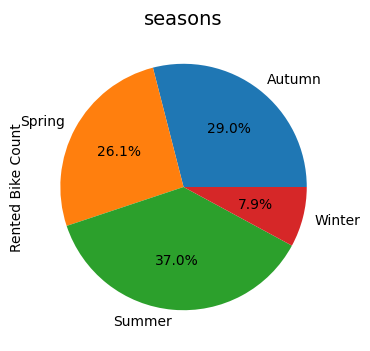

In [ ]:
# setting figure size
plt.figure(figsize=(8,4))

# plotting
season_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%')

# setting up title
plt.title('seasons',fontsize=14)
plt.show()

Very less number of bike are book in winter(7.9%) this due to lower temperature(negatine temperature) bike are less prefered by people.

Summer season having maximum number of bike booking

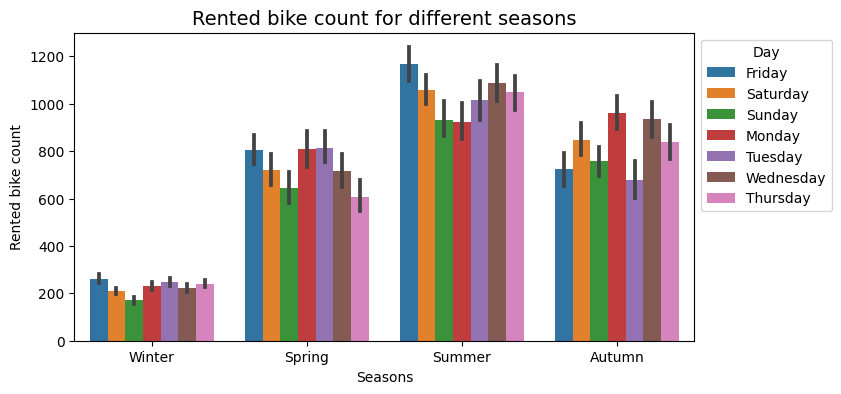

In [ ]:
# setting figure size
plt.figure(figsize=(8,4))

# plotting
sns.barplot(data=bike_df,x='Seasons',y='Rented Bike Count',hue='Day')

# setting up title
plt.title('Rented bike count for different seasons',fontsize=14)

# setting up x and y label
plt.xlabel("Seasons")
plt.ylabel("Rented bike count")

# setting up legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=10,title='Day')
plt.show()

for summer and winter season, very less number of bike are book on Monday and Sunday

for spring and summer season, Thursday have maximum number of bike booking

for Autumn season,Monday having maximum number of bike booking and Tuesday have least.

In [ ]:
temper_df=bike_df.groupby('Hour').mean()


In [ ]:
# Changing feature name
Rented_Bike_Count=temper_df['Rented Bike Count']
hour=temper_df.index
Temperature=temper_df['Temperature(°C)']
Humidity=temper_df['Humidity(%)']
Wind_speed=temper_df['Wind speed (m/s)']
Visibility=temper_df['Visibility (10m)']
Dew_point_temperature=temper_df['Dew point temperature(°C)']
Solar_Radiation=temper_df['Solar Radiation (MJ/m2)']
Rainfall=temper_df['Rainfall(mm)']
Snowfall=temper_df['Snowfall (cm)']

In [ ]:

# copy the data
df_max_scaled = temper_df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
# display(df_max_scaled)

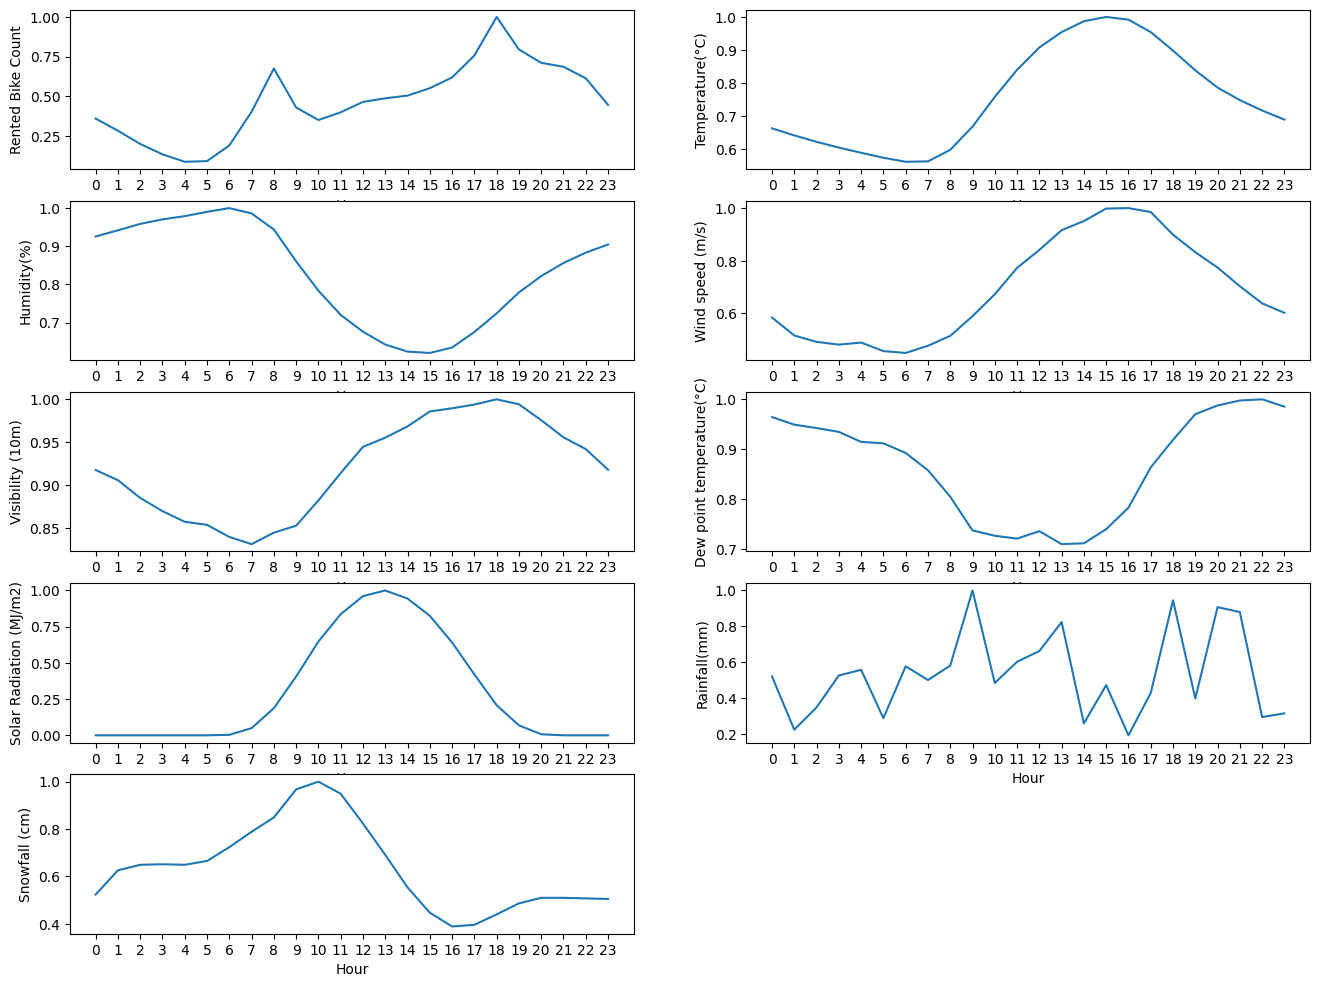

In [ ]:
plt.figure(figsize = (16,12))
plt.subplot(5,2,1)
sns.lineplot(data=df_max_scaled, x=hour, y='Rented Bike Count')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.subplot(5,2,2)
sns.lineplot(data=df_max_scaled, x=hour, y='Temperature(°C)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.subplot(5,2,3)
sns.lineplot(data=df_max_scaled, x=hour, y='Humidity(%)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.subplot(5,2,4)
sns.lineplot(data=df_max_scaled, x=hour, y='Wind speed (m/s)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.subplot(5,2,5)
sns.lineplot(data=df_max_scaled, x=hour, y='Visibility (10m)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.subplot(5,2,6)
sns.lineplot(data=df_max_scaled, x=hour, y='Dew point temperature(°C)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.subplot(5,2,7)
sns.lineplot(data=df_max_scaled, x=hour, y='Solar Radiation (MJ/m2)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.subplot(5,2,8)
sns.lineplot(data=df_max_scaled, x=hour, y='Rainfall(mm)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.subplot(5,2,9)
sns.lineplot(data=df_max_scaled, x=hour, y='Snowfall (cm)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

ax1.grid()
plt.show()

In [ ]:
# categorizing numerical and categorical columns
numeric_cols = bike_df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = bike_df.select_dtypes(['object','category']).columns.tolist()


In [ ]:
numeric_cols

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
categorical_cols

['Seasons',
 'Holiday',
 'Functioning Day',
 'Year',
 'Month',
 'Day',
 'type of day']

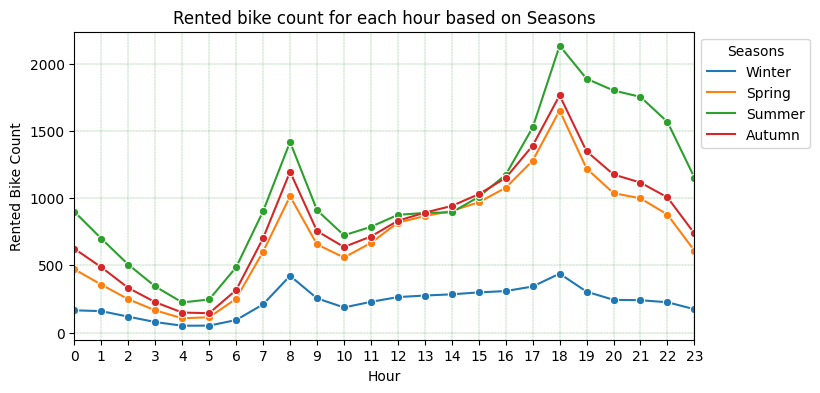

<Figure size 1600x900 with 0 Axes>

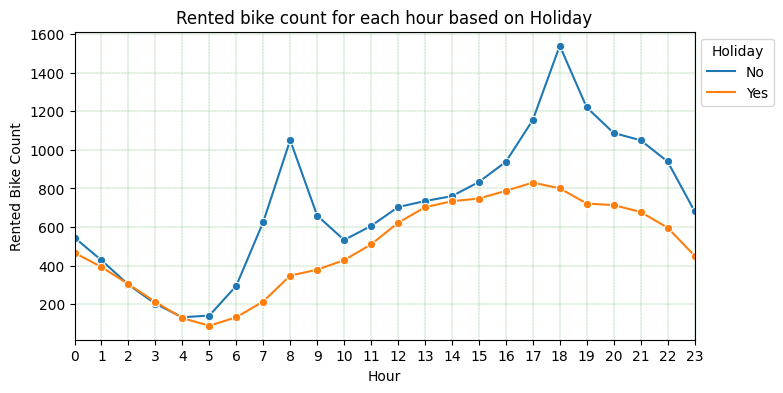

<Figure size 1600x900 with 0 Axes>

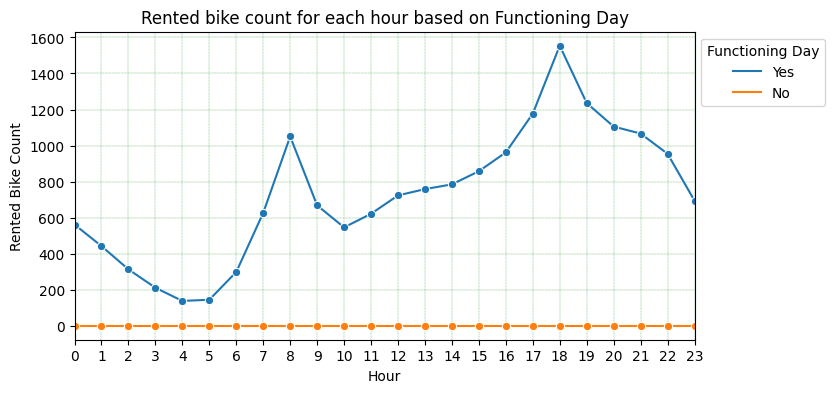

<Figure size 1600x900 with 0 Axes>

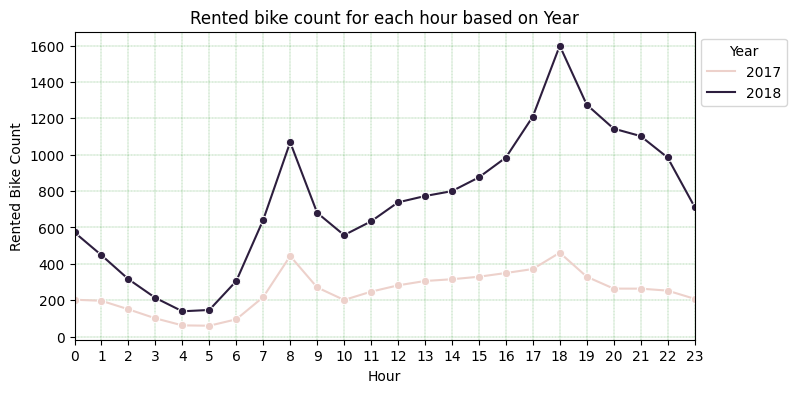

<Figure size 1600x900 with 0 Axes>

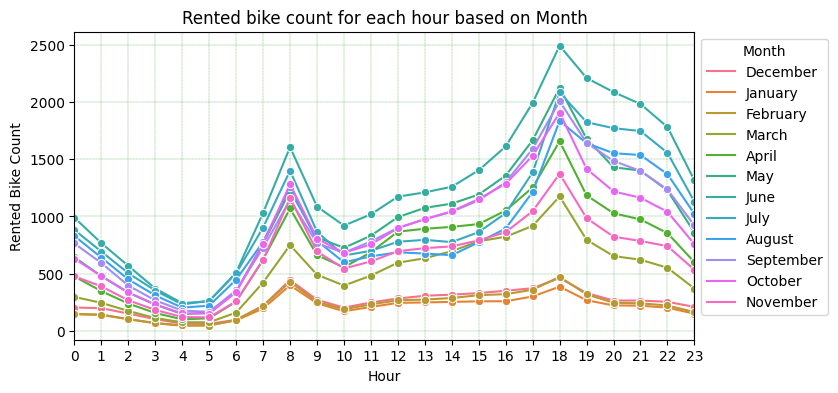

<Figure size 1600x900 with 0 Axes>

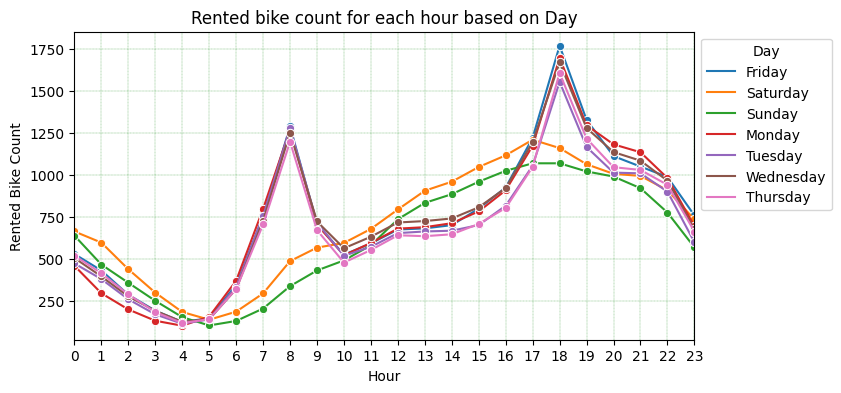

<Figure size 1600x900 with 0 Axes>

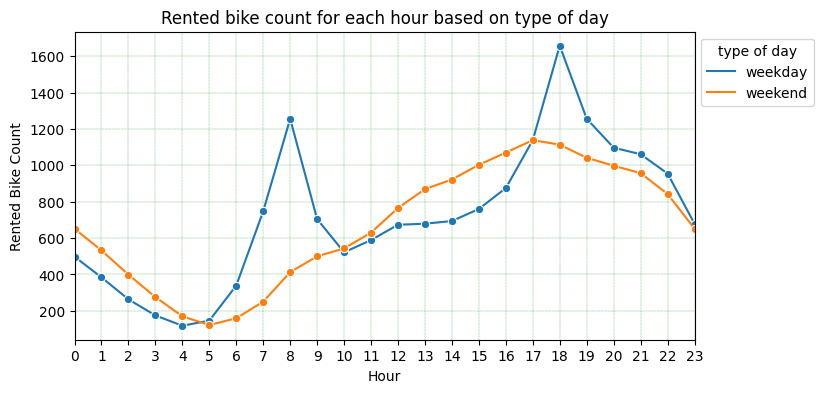

<Figure size 1600x900 with 0 Axes>

In [ ]:
for i in categorical_cols:
  if i == numeric_cols[1]:
    continue
  else:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.lineplot(data=bike_df, x=numeric_cols[1], y='Rented Bike Count', hue=i, ax=ax,marker = "o",ci=None)
    plt.title('Rented bike count for each hour based on '+i)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
    ax.set_xlim((0, 23))
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title=i)
    plt.figure(figsize=(16,9))
  
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.2)
 
    plt.show()

* When we plot rented bike count for the period of 24 hour by taking categorical variable as a hue parameter, we found that:
* Rented bike count follow a similar pattern for each of the four seasons
* On office stating time (08 :00 for morning shift and 18:00 for night shift) and office leaving time (08 :00 for evening shift and 18:00  for night shift)  maximum number of booking.
* Booking count on working day is more than holiday.
* Bike are only booked on functioning day, it means that there is no emergency provision.
* For each month, peak time is 08:00 hours in morning and 16::00 in the evening, the possible reason for this timing is office hour.
* December, January and February have a smaller number of bike bookings as compare to other month, possible reason for this temperature is very less in these months.
* Saturday and Sunday (weekend)do not show peak on 08:00 hours and 16:00 hours, possible reason for this is holiday.


In [ ]:
bike_df['type of day']=bike_df['type of day'].astype('object')

In [ ]:
# categorizing numerical and categorical columns
numeric_cols = bike_df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = bike_df.select_dtypes(['object','category']).columns.tolist()

In [ ]:
numeric_cols

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
print(bike_df.skew())

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Year                         -2.978262
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


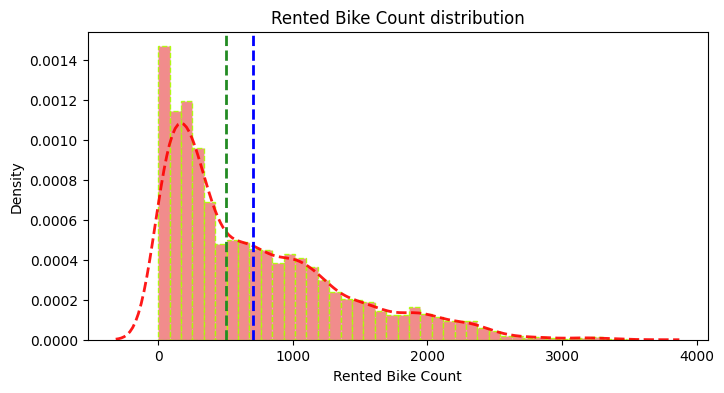

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


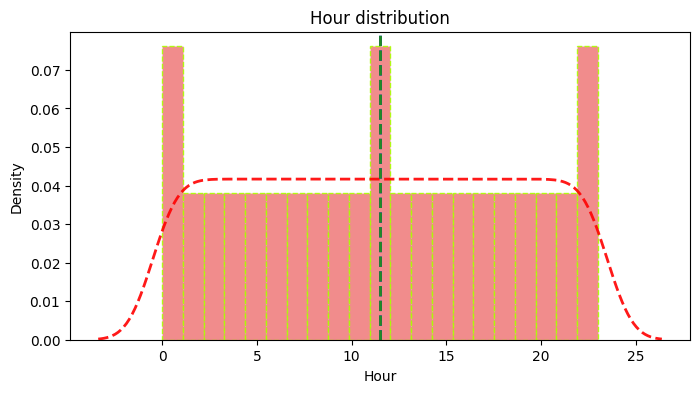

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


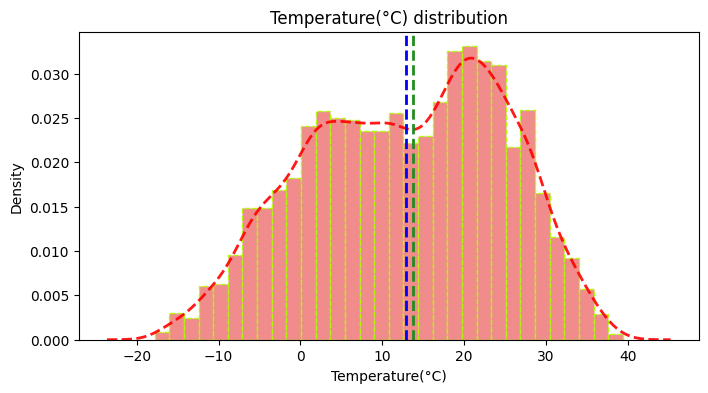

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


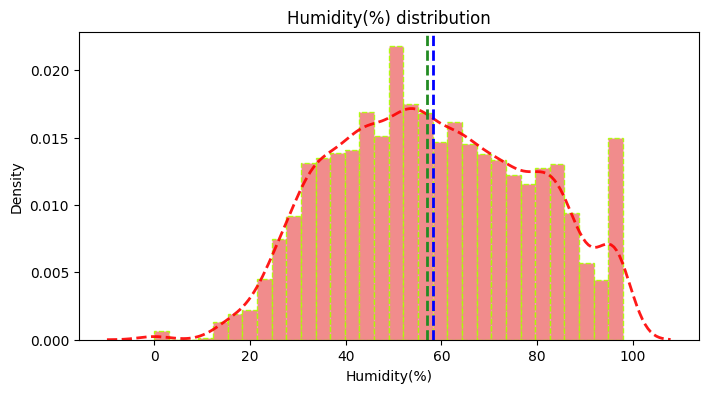

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


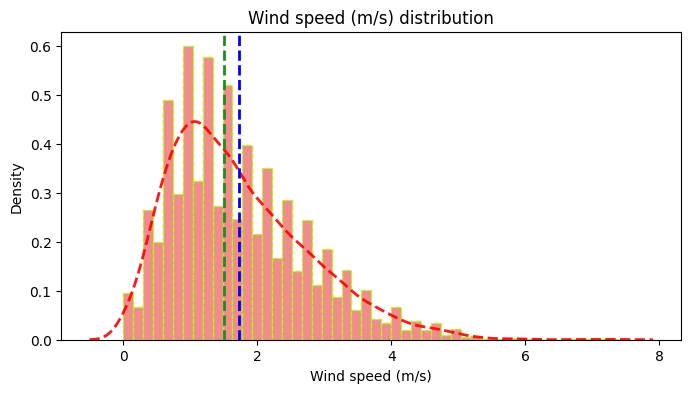

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


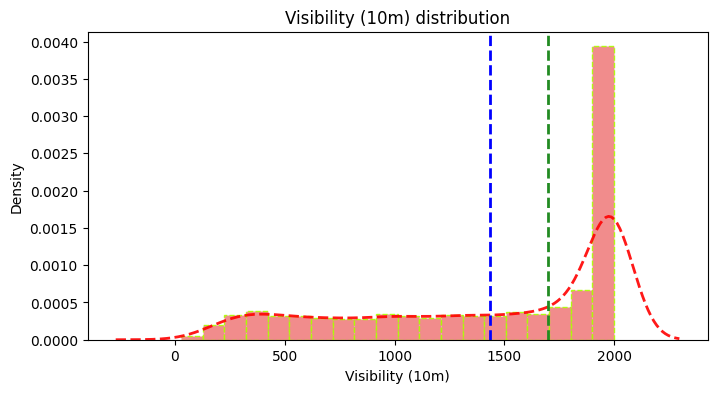

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


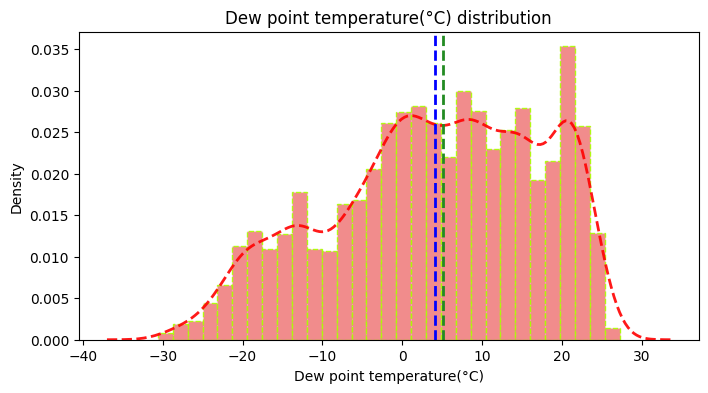

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


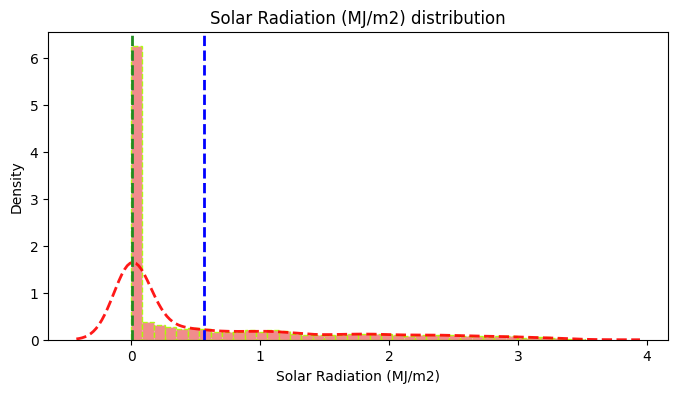

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


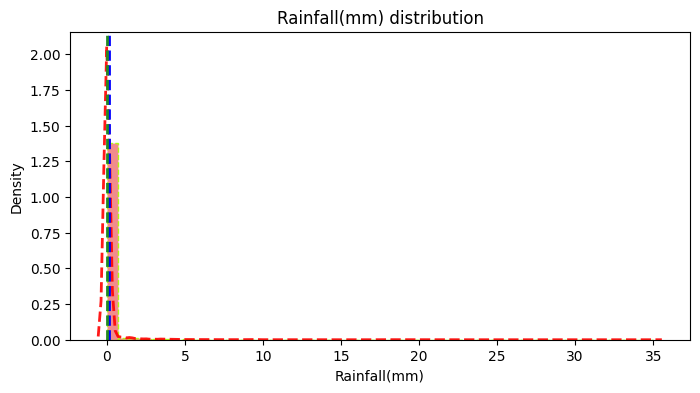

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


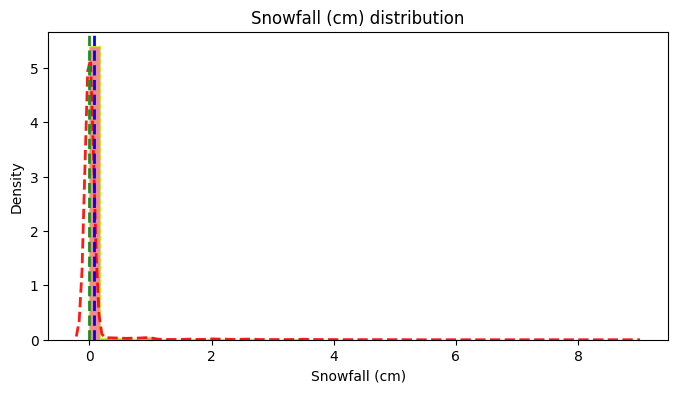

In [ ]:
# checking for skewness in features of dataset

for cols in numeric_cols:
  plt.figure(figsize=(8,4))
  sns.distplot(bike_df[cols],
               hist_kws = {'color':'lightcoral', 'edgecolor':'#aaff00',
                       'linewidth':1, 'linestyle':'--', 'alpha':0.9},  
               kde_kws = {'color':'red', 
                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
  plt.axvline(bike_df[cols].mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(bike_df[cols].median(), color='forestgreen', linestyle='dashed', linewidth=2)
  plt.title(cols+' distribution')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


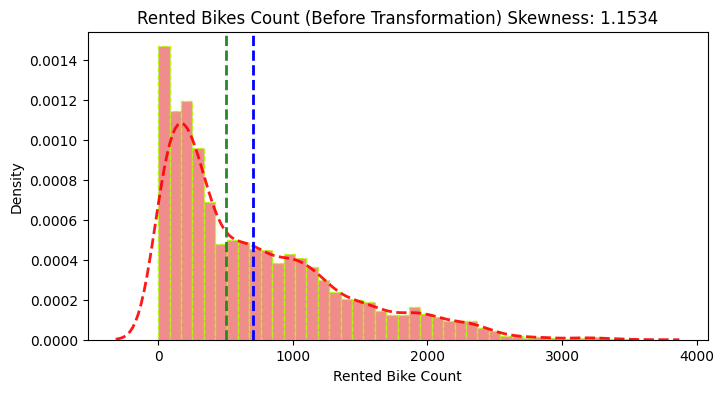

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(bike_df['Rented Bike Count'],
               hist_kws = {'color':'lightcoral', 'edgecolor':'#aaff00',
                       'linewidth':1, 'linestyle':'--', 'alpha':0.9},  
               kde_kws = {'color':'red', 
                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.axvline(bike_df['Rented Bike Count'].mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(bike_df['Rented Bike Count'].median(), color='forestgreen', linestyle='dashed', linewidth=2)
skewness=round(bike_df['Rented Bike Count'].skew(),4)
plt.title('Rented Bikes Count (Before Transformation) Skewness: '+ str(skewness))
plt.show()

In [ ]:
print('Skewness of the Rented Bike Count (Target Variable):\n',bike_df['Rented Bike Count'].skew())

Skewness of the Rented Bike Count (Target Variable):
 1.1534281773679014


* Target variable i.e. "Rented Bike Count" is positively skewed and we know that as per assumption of linear regression,target variable must be normally distributed,hence using "sqrt transform" or "log transform" we can convert it into normal form.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


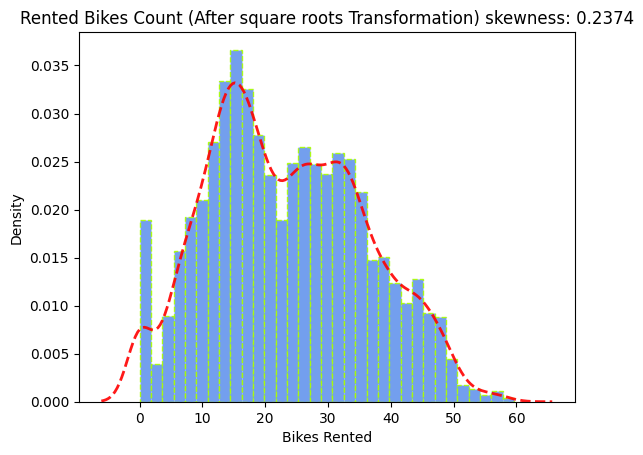

Skewness of the Rented Bike Count (Target Variable):
 0.237362090985412


In [ ]:
# Treating skewness in dataset:-

bike_df['Rented Bike Count']=np.sqrt(bike_df['Rented Bike Count'])
sns.distplot(bike_df['Rented Bike Count'],hist_kws = {'color':'cornflowerblue', 'edgecolor':'#aaff00',
                       'linewidth':1, 'linestyle':'--', 'alpha':0.9},
             
            kde_kws = {'color':'red', 
                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
skewness=round(bike_df['Rented Bike Count'].skew(),4)
plt.title('Rented Bikes Count (After square roots Transformation) skewness: '+ str(skewness))
plt.xlabel('Bikes Rented')
plt.show()
print('Skewness of the Rented Bike Count (Target Variable):\n',bike_df['Rented Bike Count'].skew())

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

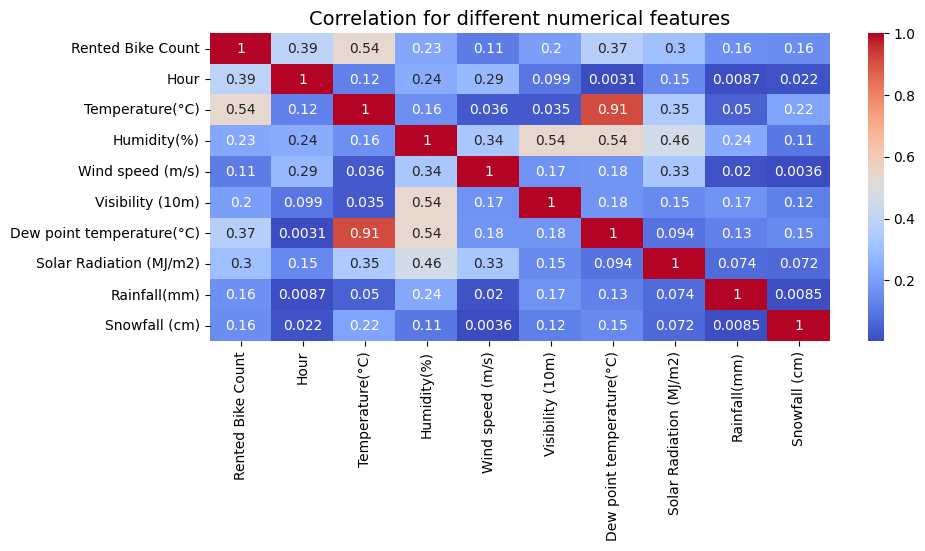

In [ ]:
# setting figure size
plt.figure(figsize=(10,4))

# creating correlation dataframe and plot them using heatmap
corr=bike_df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

# setting up title
plt.title('Correlation for different numerical features',fontsize=14)

plt.show()

* Temperature shows high collinearity with dew point temperature
* Humidity and visibility are moderately correlated.
* temperature and hour show positive correlation with rented bike count
* As per domain knowledge, there dew point temperature column is irrelavant to find the rented bike count.
Hence, we will drop dew point temperature columns.

In [ ]:
bike_df=bike_df.drop('Dew point temperature(°C)',axis=1)

* As we extracted 'Day','Month'and 'year' from 'date' column hence, we will drop it.

## Check for multicollinearity

In [ ]:
bike_df=bike_df.drop('Date',axis=1)

In [ ]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def total_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, cols) for cols in range(x.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# multicollinearity result

total_vif(bike_df[[i for i in numeric_cols if i not in ['Rented Bike Count','Date','Dew point temperature(°C)']]])

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

VIF is less than 5 hence there is no multicollinearity between independent features

**data is given for the period of 1 year, hence there is no use of year column,hence we will drop "year" columns**

In [ ]:
bike_df=bike_df.drop('Year',axis=1)

In [ ]:
bike_df.head(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0          15.937377     0             -5.2           37               2.2   
1          14.282857     1             -5.5           38               0.8   
2          13.152946     2             -6.0           39               1.0   
3          10.344080     3             -6.2           40               0.9   
4           8.831761     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

  Seasons Holiday Functioning Day     Month     Day type of day  
0  Winter      No             Yes  December  Friday     weekday  
1  Winter      No             Yes  December  Friday     weekday  
2  Winter      No             Yes  December  Friday     weekday  
3  Winter      No             Yes  December  Friday     weekday  
4  Winter      No             Yes  December  Friday     weekday

# Modelling

In [ ]:
bike_df_ohe= pd.get_dummies(bike_df, columns=['Seasons', 'Holiday', 'Functioning Day','Month','Day','type of day'],drop_first=True) 

In [ ]:
list(bike_df_ohe.columns)

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_Yes',
 'Functioning Day_Yes',
 'Month_January',
 'Month_February',
 'Month_March',
 'Month_April',
 'Month_May',
 'Month_June',
 'Month_July',
 'Month_August',
 'Month_September',
 'Month_October',
 'Month_November',
 'Day_Monday',
 'Day_Saturday',
 'Day_Sunday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'type of day_weekend']

In [ ]:
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0          15.937377     0             -5.2           37               2.2   
1          14.282857     1             -5.5           38               0.8   
2          13.152946     2             -6.0           39               1.0   
3          10.344080     3             -6.2           40               0.9   
4           8.831761     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

  Seasons Holiday Functioning Day     Month     Day type of day  
0  Winter      No             Yes  December  Friday     weekday  
1  Winter      No             Yes  December  Friday     weekday  
2  Winter      No             Yes  December  Friday     weekday  
3  Winter      No             Yes  December  Friday     weekday  
4  Winter      No             Yes  December  Friday     weekday

In [ ]:
x = bike_df_ohe.drop(columns=['Rented Bike Count'])
y = bike_df_ohe['Rented Bike Count']

In [ ]:
#Loading the training modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state = 0)

In [ ]:
X_train.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
2031    15              8.2           62               0.6               291   
6570    18             28.4           57               2.4              2000   
6371    11             29.9           57               1.7              1992   
3490    10             14.8           29               0.6              1749   
7700    20             12.2           47               1.1              2000   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons_Spring  \
2031                     1.22           0.0            0.0               0   
6570                     0.84           0.0            0.0               0   
6371                     0.88           0.1            0.0               0   
3490                     2.20           0.0            0.0               1   
7700                     0.00           0.0            0.0               0   

      Seasons_Summer  Seasons_Winter  Holiday_Yes  Functioning Day_Yes  \
2031               0               1            0                    1   
6570               1               0            0                    1   
6371               1               0            0                    1   
3490               0               0            0                    1   
7700               0               0            0                    1   

      Month_January  Month_February  Month_March  Month_April  Month_May  \
2031              0               1            0            0          0   
6570              0               0            0            0          0   
6371              0               0            0            0          0   
3490              0               0            0            1          0   
7700              0               0            0            0          0   

      Month_June  Month_July  Month_August  Month_September  Month_October  \
2031           0           0             0                0              0   
6570           0           0             1                0              0   
6371           0           0             1                0              0   
3490           0           0             0                0              0   
7700           0           0             0                0              1   

      Month_November  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
2031               0           0             0           0             0   
6570               0           0             0           0             0   
6371               0           0             0           0             1   
3490               0           0             0           0             0   
7700               0           0             0           0             0   

      Day_Tuesday  Day_Wednesday  type of day_weekend  
2031            0              0                    0  
6570            0              0                    0  
6371            0              0                    0  
3490            0              1                    0  
7700            0              1                    0

In [ ]:
# ['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

In [ ]:
# Transforming data
sc = MinMaxScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7008, 31), (1752, 31), (7008,), (1752,))

**X_train, X_test= data is not scaled**
* Decision-tree regression model
* Random forest regression model
* Gradient boosting

**x_test, x_test= data is scaled**
* Linear Regression
* Ridge Regression
* lasso regression
* Polynomial Regression
* elastic net regularization

## Linear Regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
lr_bike = LinearRegression()
lr_bike.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Train set results
y_pred_train_lr = lr_bike.predict(x_train)

# Predicting the Test set results
y_pred_test_lr = lr_bike.predict(x_test)

***Matrix evaluation for train data***

In [ ]:

# r2 score of train set
R2 = r2_score(y_train, y_pred_train_lr)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train_lr)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train_lr)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)


R2 Score: 0.6834347217003816
Mean Absolute Error (MAE): 5.350276944839658
Mean Squred Error(MSE): 48.856507923721665
Root Mean Squared Error(RMSE): 6.989743051337557


In [ ]:
# train_eval_mat(y_predict_train,x_train,y_train)

In [ ]:
train_dict={'data': "Train data",
            'Model':"Linear Regression",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
              }

In [ ]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

data              Model       MAE        MSE      RMSE  R2_score
1  Train data  Linear Regression  5.350277  48.856508  6.989743  0.683435

***Matrix evaluation for test data***

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, y_pred_test_lr)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test_lr)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test_lr)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)


R2 Score: 0.6860533542177286
Mean Absolute Error (MAE): 5.383963239061504
Mean Squred Error(MSE): 49.442282197660354
Root Mean Squared Error(RMSE): 7.031520617736988


In [ ]:
# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"Linear Regression",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

data              Model       MAE        MSE      RMSE  R2_score
1  Test data  Linear Regression  5.383963  49.442282  7.031521  0.686053

In [ ]:
lr_bike.coef_

array([ 1.08736601e+01,  3.24599847e+01, -1.44617298e+01,  8.18384418e-01,
        2.19451127e+00, -3.81897947e+00, -5.35053874e+01, -4.07638820e-01,
        1.71326354e+14,  4.67119574e+13,  2.78332752e+13, -3.41620165e+00,
        2.96699628e+01, -2.16586408e+00, -2.75977603e+00, -1.43493079e+14,
       -1.43493079e+14, -1.43493079e+14, -1.88786822e+13, -1.88786822e+13,
       -1.88786822e+13,  2.78332752e+13,  2.78332752e+13,  2.78332752e+13,
       -1.29999005e+00, -2.61831366e+13, -2.61831366e+13, -5.18621777e-01,
       -1.03941755e-01, -1.71678498e-01,  2.61831366e+13])

In [ ]:
lr_bike .intercept_

-27833275173028.67

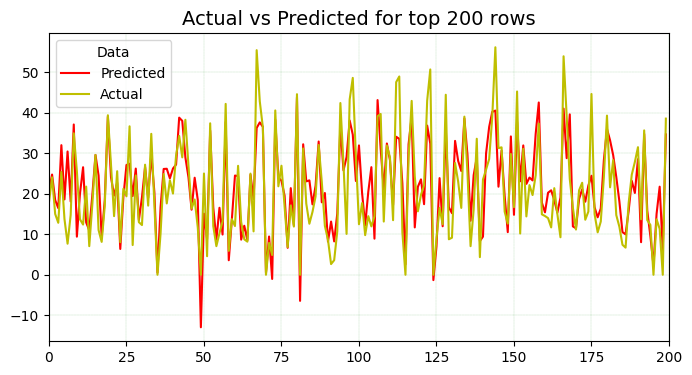

In [ ]:
plt.figure(figsize=(8,4))
plt.plot((y_pred_test_lr)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=14)

plt.show()

(-20.0, 50.0)

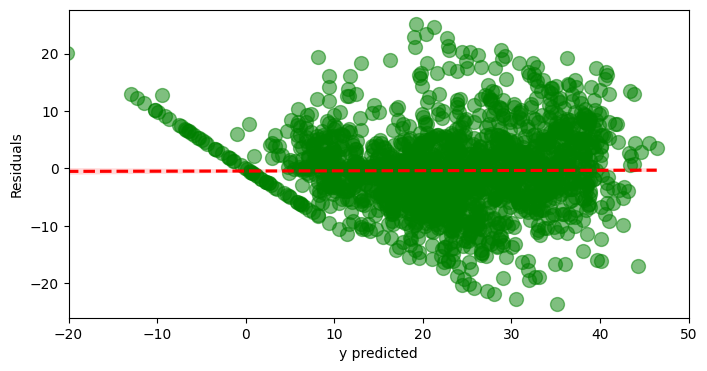

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=y_pred_test_lr,y=y_test-y_pred_test_lr,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
plt.xlim([-20, 50])

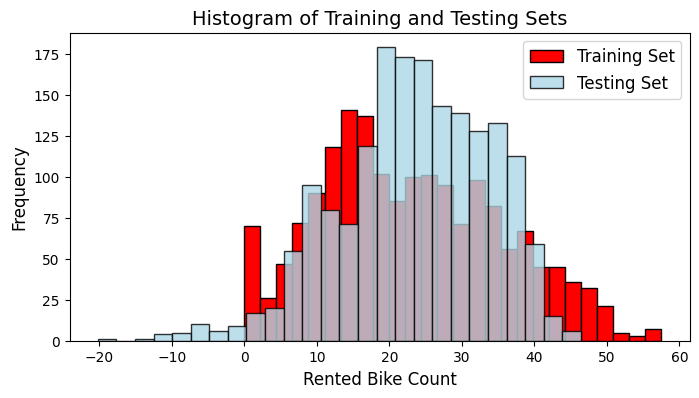

In [ ]:
#Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(y_pred_test_lr, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

plt.show()

model is so simple that it is not able to understand the data

## Ridge Regression

In [ ]:
ridge_bike=Ridge(alpha=0.1)
ridge_bike.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred_train_rd=ridge_bike.predict(x_train)
y_pred_test_rd=ridge_bike.predict(x_test)

***Matrix evaluation for train data***

In [ ]:
R2=r2_score(y_train,y_pred_train_rd)
print("R2 Score:" ,R2)
MAE=mean_absolute_error(y_train,y_pred_train_rd)
print("Mean Absolute Error (MAE):", MAE)
MSE=mean_squared_error(y_train,y_pred_train_rd)
print("Mean Squred Error(MSE):" , MSE)
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)



R2 Score: 0.6838094608060301
Mean Absolute Error (MAE): 5.348744015163955
Mean Squred Error(MSE): 48.79867326736647
Root Mean Squared Error(RMSE): 6.985604717371752


In [ ]:
train_dict={'data': "Train data",
            'Model':"Ridge Regression",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
            }

In [ ]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data              Model       MAE        MSE      RMSE  R2_score
0  Train data  Linear Regression  5.350277  48.856508  6.989743  0.683435
1  Train data   Ridge Regression  5.348744  48.798673  6.985605  0.683809

***Matrix evaluation for test data***

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, y_pred_test_rd)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test_rd)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test_rd)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)




R2 Score: 0.6860989537584545
Mean Absolute Error (MAE): 5.389070784501833
Mean Squred Error(MSE): 49.43510089666243
Root Mean Squared Error(RMSE): 7.031009948553795


In [ ]:
test_dict={'data': "Test data",
            'Model':"Ridge Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

data              Model       MAE        MSE      RMSE  R2_score
0  Test data  Linear Regression  5.383963  49.442282  7.031521  0.686053
1  Test data   Ridge Regression  5.389100  49.435100  7.031000  0.686100

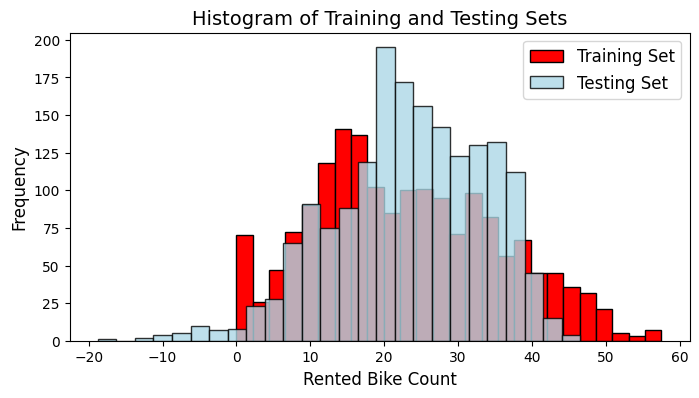

In [ ]:
#Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(y_pred_test_rd, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

plt.show()

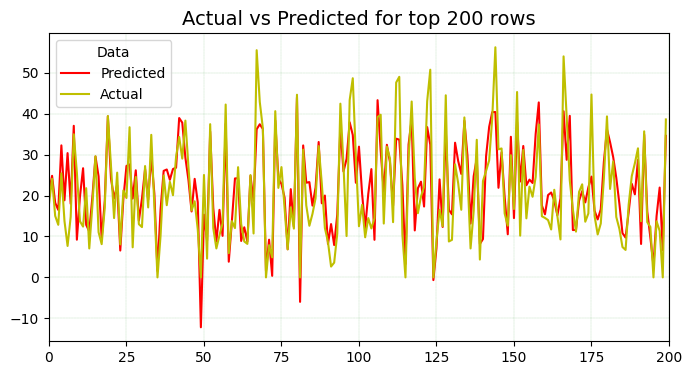

In [ ]:
plt.figure(figsize=(8,4))
plt.plot((y_pred_test_rd)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=14)

plt.show()

(-20.0, 50.0)

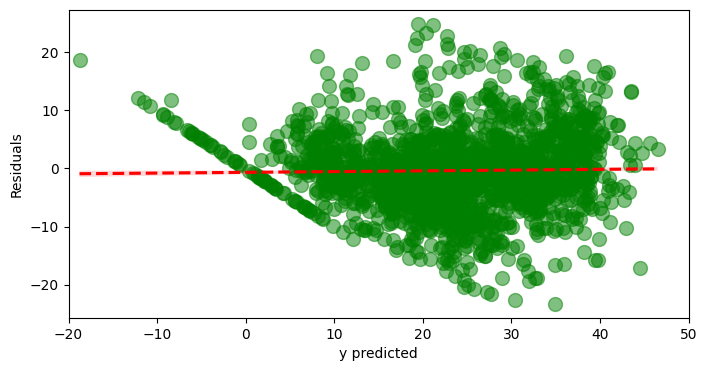

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=y_pred_test_rd,y=y_test-y_pred_test_rd,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
plt.xlim([-20,50])

## lasso regression

In [ ]:
# creating object
lasso_reg_bike=Lasso(alpha=0.1)

In [ ]:
# Fitting and training the model
lasso_reg_bike.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
# Check coefficient
lasso_reg_bike.coef_

array([ 11.00263785,  18.6235564 , -12.34859343,   0.        ,
         1.78654632,   0.        ,  -0.        ,  -0.        ,
        -0.13384715,  -0.        ,  -7.5291209 ,  -0.58538141,
        24.12520684,  -0.        ,  -0.10917129,  -1.90639674,
        -0.46029892,   0.22263553,   3.46139905,  -0.        ,
        -1.58213334,   0.        ,   1.17950471,   0.        ,
        -0.        ,  -0.        ,  -1.0370832 ,  -0.        ,
         0.        ,   0.        ,  -0.26961987])

In [ ]:
# get dataframe of x columns and Coeficients
# pd.DataFrame(lasso_reg_bike.coef_,x.columns,columns=['Coefficients']).reset_index().rename(columns={'index':'Independent Feature'})

In [ ]:
# y prdiction on train data
y_pred_train_ls=lasso_reg_bike.predict(x_train)
# y prdiction on test data
y_pred_test_ls=lasso_reg_bike.predict(x_test)

***Matrix evaluation for train data***

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, y_pred_train_ls)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train_ls)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train_ls)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.6421744733379022
Mean Absolute Error (MAE): 5.712604526194539
Mean Squred Error(MSE): 55.22433089497085
Root Mean Squared Error(RMSE): 7.431307482197924


In [ ]:
train_dict={'data': "Train data",
            'Model':"Lasso Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data              Model       MAE        MSE      RMSE  R2_score
0  Train data  Linear Regression  5.350277  48.856508  6.989743  0.683435
1  Train data   Ridge Regression  5.348744  48.798673  6.985605  0.683809
2  Train data   Lasso Regression  5.712600  55.224300  7.431300  0.642200

***Matrix evaluation for test data***

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, y_pred_test_ls)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test_ls)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test_ls)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.6360398053817098
Mean Absolute Error (MAE): 5.853671776976896
Mean Squred Error(MSE): 57.31872881200591
Root Mean Squared Error(RMSE): 7.570913340674684


In [ ]:
# Create test results dictionary
test_dict={'data': "Test data",
            'Model':"Lasso Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [ ]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

data              Model       MAE        MSE      RMSE  R2_score
0  Test data  Linear Regression  5.383963  49.442282  7.031521  0.686053
1  Test data   Ridge Regression  5.389100  49.435100  7.031000  0.686100
2  Test data   Lasso Regression  5.853700  57.318700  7.570900  0.636000

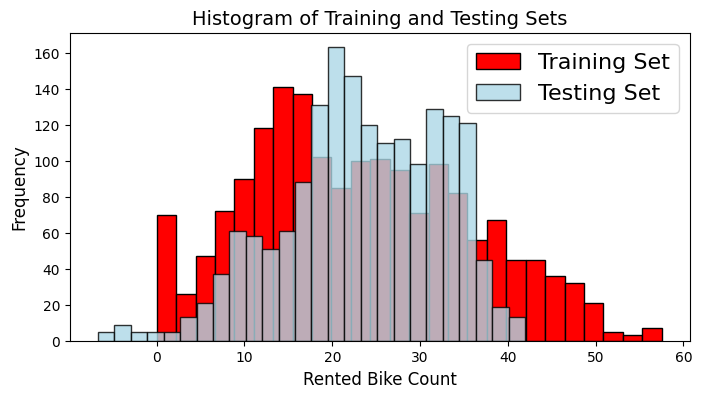

In [ ]:
#Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(y_pred_test_ls, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=16)

plt.show()

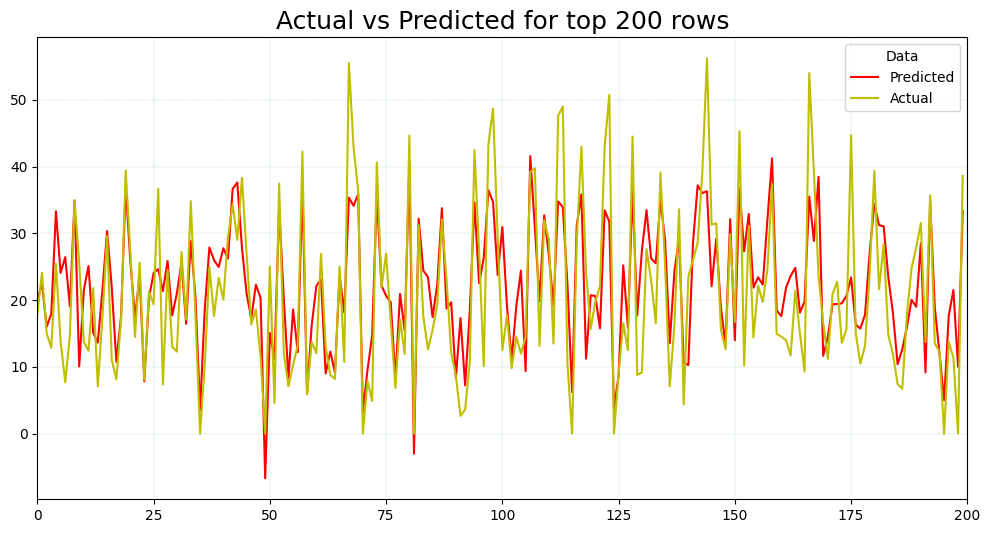

In [ ]:
y_pred_test_rd
plt.figure(figsize=(12,6))
plt.plot((y_pred_test_ls)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()

(-10.0, 45.0)

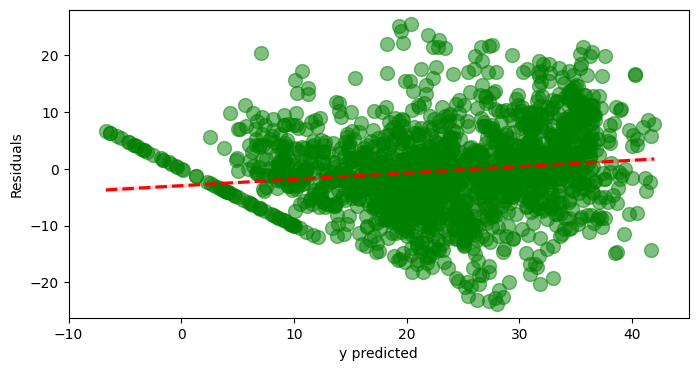

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=y_pred_test_ls,y=y_test-y_pred_test_ls,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
plt.xlim([-10,45])

## Ridge regression with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

In [ ]:
ridge_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   60, 100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [ ]:
best_param_ridge_grid=ridge_grid.best_params_
best_param_ridge_grid

{'alpha': 0.01}

In [ ]:
# Predicting the Train set results
y_pred_train_rd_grid = ridge_grid.predict(x_train)

# Predicting the Test set results
y_pred_test_rd_grid = ridge_grid.predict(x_test)

**Matrix evaluation for training**

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, y_pred_train_rd_grid)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train_rd_grid)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train_rd_grid)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.6838131209978477
Mean Absolute Error (MAE): 5.34785101581901
Mean Squred Error(MSE): 48.79810837853374
Root Mean Squared Error(RMSE): 6.98556428490453


In [ ]:
train_dict={'data': "Train data",
            'Model':"Ridge with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2}

In [ ]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data                    Model       MAE        MSE      RMSE  \
0  Train data        Linear Regression  5.350277  48.856508  6.989743   
1  Train data         Ridge Regression  5.348744  48.798673  6.985605   
2  Train data         Lasso Regression  5.712600  55.224300  7.431300   
3  Train data  Ridge with GridSearchCV  5.347851  48.798108  6.985564   

   R2_score  
0  0.683435  
1  0.683809  
2  0.642200  
3  0.683813

**Matrix evaluation for test data**

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, y_pred_test_rd_grid)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test_rd_grid)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test_rd_grid)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.6862042393597532
Mean Absolute Error (MAE): 5.387831805483941
Mean Squred Error(MSE): 49.41851986137923
Root Mean Squared Error(RMSE): 7.0298307135648175


In [ ]:
# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"Ridge with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

data                    Model       MAE        MSE      RMSE  R2_score
0  Test data        Linear Regression  5.383963  49.442282  7.031521  0.686053
1  Test data         Ridge Regression  5.389100  49.435100  7.031000  0.686100
2  Test data         Lasso Regression  5.853700  57.318700  7.570900  0.636000
3  Test data  Ridge with GridSearchCV  5.387832  49.418520  7.029831  0.686204

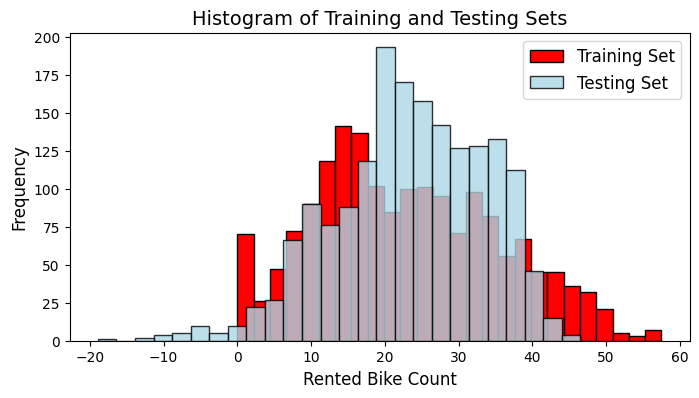

In [ ]:
#Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(y_pred_test_rd_grid, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

plt.show()

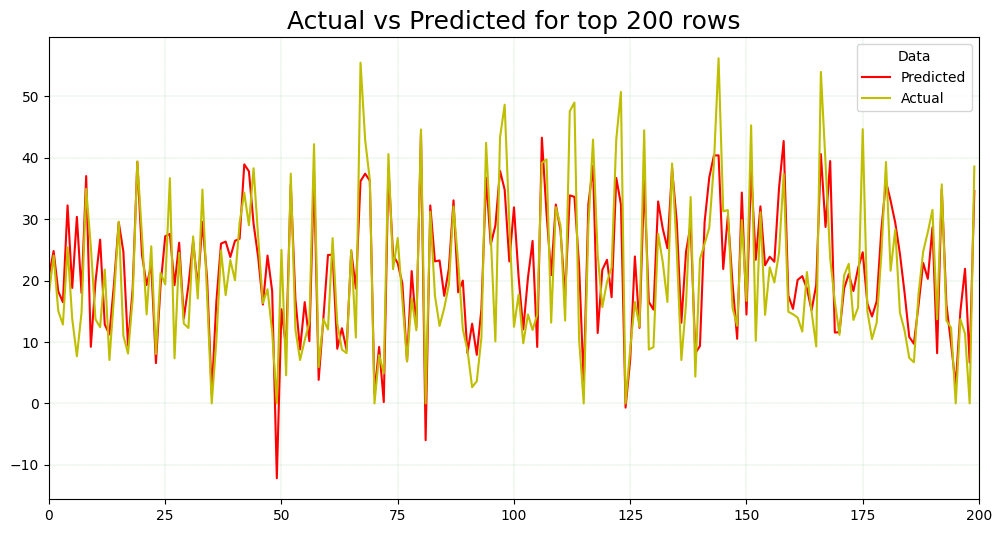

In [ ]:

plt.figure(figsize=(12,6))
plt.plot((y_pred_test_rd_grid)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()

(-20.0, 50.0)

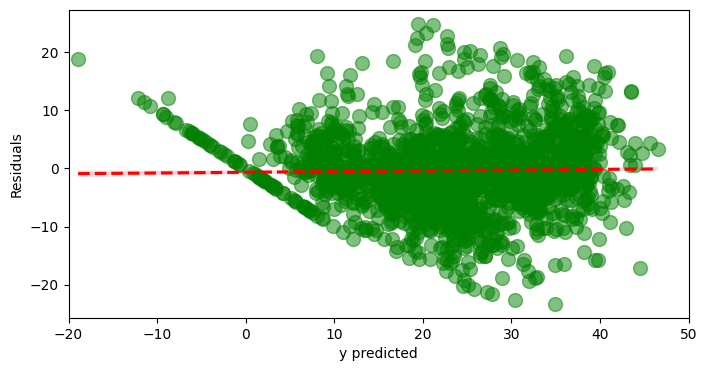

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=y_pred_test_rd_grid,y=y_test-y_pred_test_rd_grid,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
plt.xlim([-20,50])

## Lasso with GridSearchCV

In [ ]:
lasso_model = Lasso()
#setting the parameters of the lasso model
param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.0014,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_grid = GridSearchCV(lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [ ]:
lasso_grid.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.186e+04, tolerance: 8.747e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.231e+03, tolerance: 8.603e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.0014, 0.01, 0.1, 1, 5, 10, 20, 30,
                                   40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
best_param_lasso_grid=lasso_grid.best_params_
best_param_lasso_grid

{'alpha': 0.0014}

In [ ]:
# Predicting the Train set results
y_pred_train_ls_grid = lasso_grid.predict(x_train)

 # Predicting the Test set results
y_pred_test_ls_grid = lasso_grid.predict(x_test)

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, y_pred_train_ls_grid)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train_ls_grid)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train_ls_grid)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.683789850016962
Mean Absolute Error (MAE): 5.350005706923437
Mean Squred Error(MSE): 48.80169986168106
Root Mean Squared Error(RMSE): 6.985821344815587


In [ ]:
train_dict={'data': "Train data",
            'Model':"Lasso with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2}

In [ ]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data                    Model       MAE        MSE      RMSE  \
0  Train data        Linear Regression  5.350277  48.856508  6.989743   
1  Train data         Ridge Regression  5.348744  48.798673  6.985605   
2  Train data         Lasso Regression  5.712600  55.224300  7.431300   
3  Train data  Ridge with GridSearchCV  5.347851  48.798108  6.985564   
4  Train data  Lasso with GridSearchCV  5.350006  48.801700  6.985821   

   R2_score  
0  0.683435  
1  0.683809  
2  0.642200  
3  0.683813  
4  0.683790

In [ ]:
# r2 score of test set
R2 = r2_score(y_test, y_pred_test_ls_grid)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test_ls_grid)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test_ls_grid)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.685953855608039
Mean Absolute Error (MAE): 5.391017402753884
Mean Squred Error(MSE): 49.457951861294724
Root Mean Squared Error(RMSE): 7.03263477377396


In [ ]:
# Create test results dictionary
test_dict={'data': "Test data",
            'Model':"Lasso with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2}

In [ ]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

data                    Model       MAE        MSE      RMSE  R2_score
0  Test data        Linear Regression  5.383963  49.442282  7.031521  0.686053
1  Test data         Ridge Regression  5.389100  49.435100  7.031000  0.686100
2  Test data         Lasso Regression  5.853700  57.318700  7.570900  0.636000
3  Test data  Ridge with GridSearchCV  5.387832  49.418520  7.029831  0.686204
4  Test data  Lasso with GridSearchCV  5.391017  49.457952  7.032635  0.685954

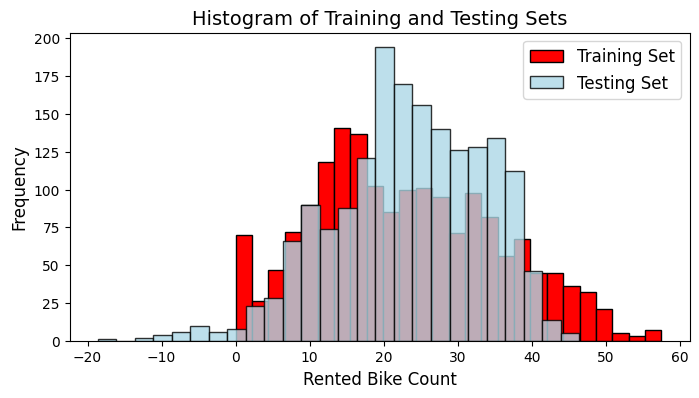

In [ ]:
#Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(y_pred_test_ls_grid, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

plt.show()

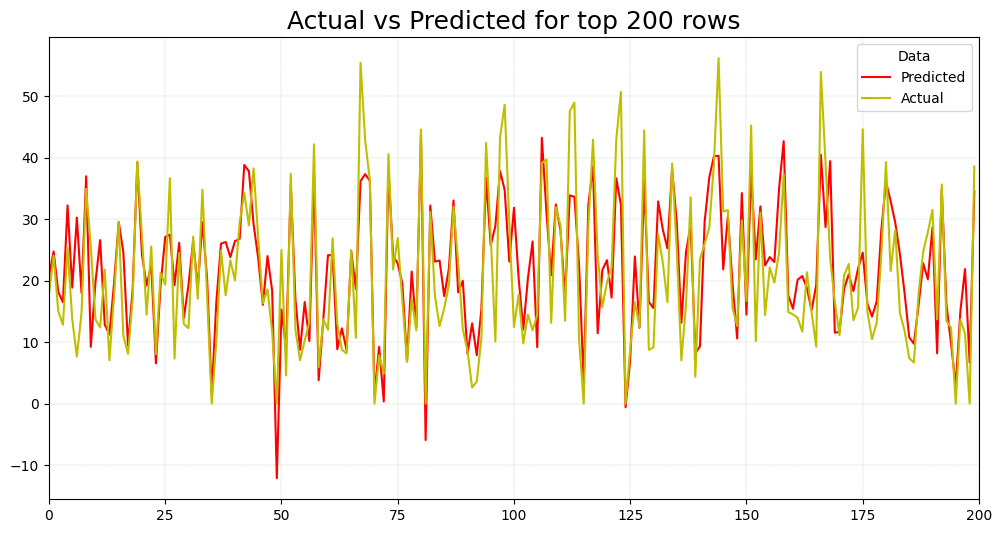

In [ ]:

plt.figure(figsize=(12,6))
plt.plot((y_pred_test_ls_grid)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()

(-20.0, 50.0)

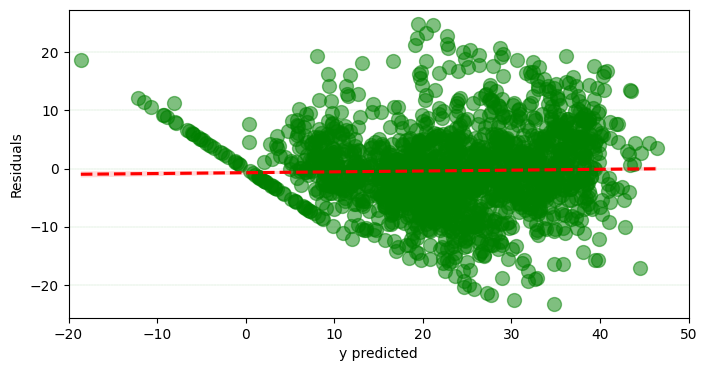

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=y_pred_test_ls_grid,y=y_test-y_pred_test_ls_grid,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.1)
plt.xlim([-20,50])

## Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree=2)

In [ ]:
poly_reg.fit(x_train)
x_train_poly = poly_reg.transform(x_train)
x_test_poly = poly_reg.transform(x_test)

In [ ]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
# lr.score(x_test_poly, y_test)

In [ ]:
# Predicting the Train set results
y_pred_train_lr_poly = lr.predict(x_train_poly)

 # Predicting the Test set results
y_pred_test_lr_poly = lr.predict(x_test_poly)

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, y_pred_train_lr_poly)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train_lr_poly)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train_lr_poly)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.8079851926167321
Mean Absolute Error (MAE): 3.9999802387917387
Mean Squred Error(MSE): 29.63424481921089
Root Mean Squared Error(RMSE): 5.4437344552440186


In [ ]:
train_dict={'data': "Train data",
            'Model':"Polynomial Regression",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2}

In [ ]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data                    Model       MAE        MSE      RMSE  \
0  Train data        Linear Regression  5.350277  48.856508  6.989743   
1  Train data         Ridge Regression  5.348744  48.798673  6.985605   
2  Train data         Lasso Regression  5.712600  55.224300  7.431300   
3  Train data  Ridge with GridSearchCV  5.347851  48.798108  6.985564   
4  Train data  Lasso with GridSearchCV  5.350006  48.801700  6.985821   
5  Train data    Polynomial Regression  3.999980  29.634245  5.443734   

   R2_score  
0  0.683435  
1  0.683809  
2  0.642200  
3  0.683813  
4  0.683790  
5  0.807985

In [ ]:
  # r2 score of test set
R2 = r2_score(y_test, y_pred_test_lr_poly)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test_lr_poly)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test_lr_poly)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.7745437537621813
Mean Absolute Error (MAE): 4.306284149648936
Mean Squred Error(MSE): 35.506260377268575
Root Mean Squared Error(RMSE): 5.958712979936907


In [ ]:
test_dict={'data': "Test data",
            'Model':"Polynomial Regression",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2}

In [ ]:
 # appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

data                    Model       MAE        MSE      RMSE  R2_score
0  Test data        Linear Regression  5.383963  49.442282  7.031521  0.686053
1  Test data         Ridge Regression  5.389100  49.435100  7.031000  0.686100
2  Test data         Lasso Regression  5.853700  57.318700  7.570900  0.636000
3  Test data  Ridge with GridSearchCV  5.387832  49.418520  7.029831  0.686204
4  Test data  Lasso with GridSearchCV  5.391017  49.457952  7.032635  0.685954
5  Test data    Polynomial Regression  4.306284  35.506260  5.958713  0.774544

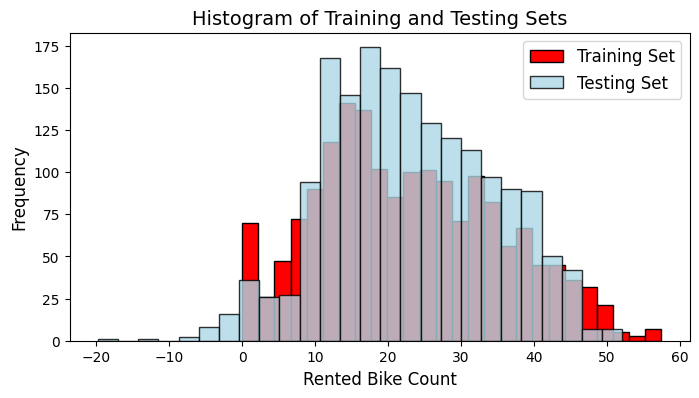

In [ ]:
#Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(y_pred_test_lr_poly, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

plt.show()

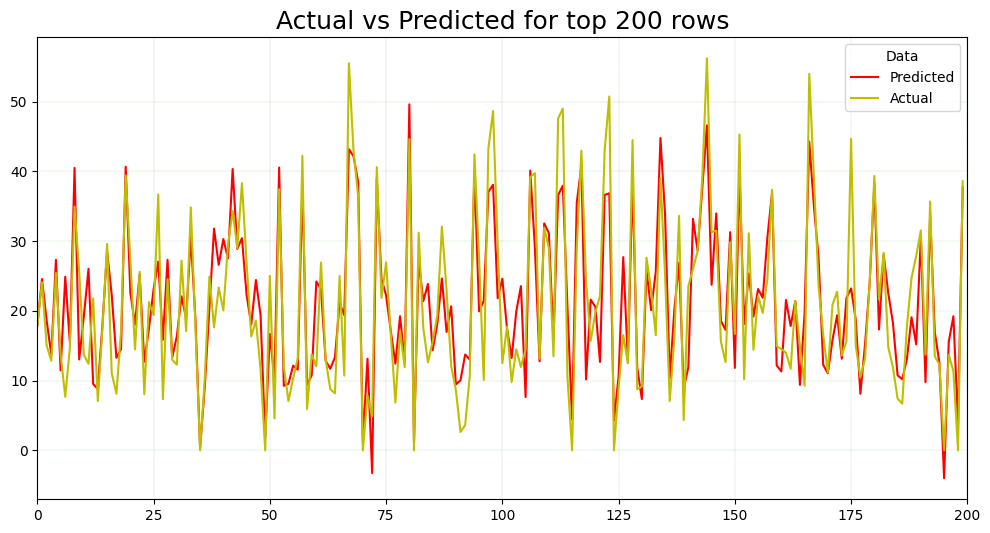

In [ ]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_test_lr_poly )[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()

(-20.0, 55.0)

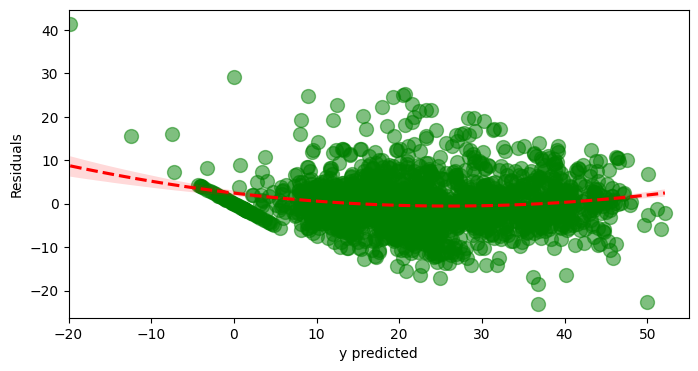

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=y_pred_test_lr_poly,y=y_test-y_pred_test_lr_poly,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60,order=2)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
plt.xlim([-20,55])

## elastic net regularization

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
en_bike = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_bike.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# Predicting the Train set results
y_pred_en_train = en_bike.predict(x_train)

# Predicting the Test set results
y_pred_en_test = en_bike.predict(x_test)

**Matrix evaluation for training data**

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, y_pred_en_train)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_en_train)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_en_train)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.5290430345079689
Mean Absolute Error (MAE): 6.627504772607658
Mean Squred Error(MSE): 72.68425911990192
Root Mean Squared Error(RMSE): 8.525506384954616


In [ ]:
train_dict={'data': "Train data",
            'Model':"ElasticNet",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data                    Model       MAE        MSE      RMSE  \
0  Train data        Linear Regression  5.350277  48.856508  6.989743   
1  Train data         Ridge Regression  5.348744  48.798673  6.985605   
2  Train data         Lasso Regression  5.712600  55.224300  7.431300   
3  Train data  Ridge with GridSearchCV  5.347851  48.798108  6.985564   
4  Train data  Lasso with GridSearchCV  5.350006  48.801700  6.985821   
5  Train data    Polynomial Regression  3.999980  29.634245  5.443734   
6  Train data               ElasticNet  6.627505  72.684259  8.525506   

   R2_score  
0  0.683435  
1  0.683809  
2  0.642200  
3  0.683813  
4  0.683790  
5  0.807985  
6  0.529043

**Matrix evaluation for test data**

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, y_pred_en_test)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_en_test)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_en_test)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.5075580816213983
Mean Absolute Error (MAE): 6.871428336724114
Mean Squred Error(MSE): 77.55283460272268
Root Mean Squared Error(RMSE): 8.806408723351574


In [ ]:
# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"ElasticNet",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

data                    Model       MAE        MSE      RMSE  R2_score
0  Test data        Linear Regression  5.383963  49.442282  7.031521  0.686053
1  Test data         Ridge Regression  5.389100  49.435100  7.031000  0.686100
2  Test data         Lasso Regression  5.853700  57.318700  7.570900  0.636000
3  Test data  Ridge with GridSearchCV  5.387832  49.418520  7.029831  0.686204
4  Test data  Lasso with GridSearchCV  5.391017  49.457952  7.032635  0.685954
5  Test data    Polynomial Regression  4.306284  35.506260  5.958713  0.774544
6  Test data               ElasticNet  6.871428  77.552835  8.806409  0.507558

In [ ]:
en_bike.score(x_train, y_train)

0.5290430345079689

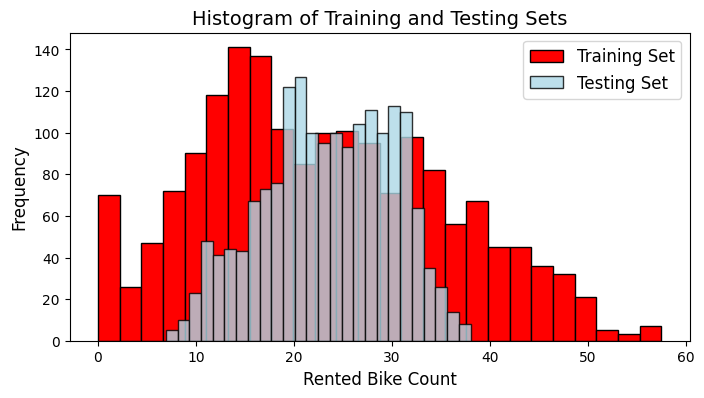

In [ ]:
#Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(y_pred_en_test, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

plt.show()

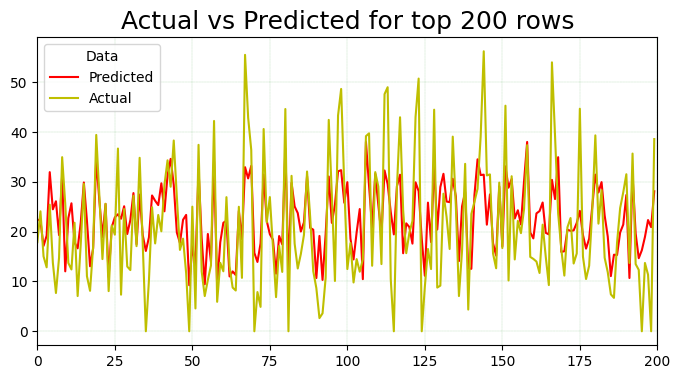

In [ ]:
plt.figure(figsize=(8,4))
plt.plot((y_pred_en_test)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()

(0.0, 40.0)

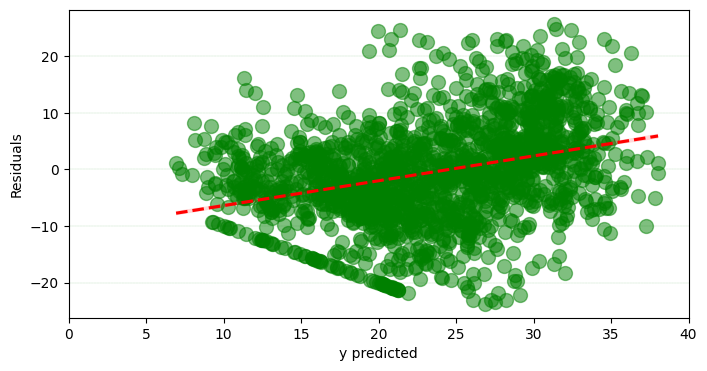

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=y_pred_en_test,y=y_test-y_pred_en_test,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.1)
plt.xlim([0, 40])


## Decision-tree regression model

In [ ]:
# training model

from sklearn.tree import DecisionTreeRegressor


In [ ]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,8,10,15,20]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,cv=10)
gridSearch_decisionTree.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 8, 10, 15, 20]})

In [ ]:
best_param_gridSearch_decisionTree=gridSearch_decisionTree.best_params_
best_param_gridSearch_decisionTree

{'max_depth': 15}

In [ ]:
# Predicting the Train set results
Y_pred_decTreeGridSearch_train = gridSearch_decisionTree.predict(X_train)

# Predicting the Test set results
Y_pred_decTreeGridSearch_test = gridSearch_decisionTree.predict(X_test)

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, Y_pred_decTreeGridSearch_train)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,Y_pred_decTreeGridSearch_train)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,Y_pred_decTreeGridSearch_train)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)


R2 Score: 0.9901034078123544
Mean Absolute Error (MAE): 0.6110575088809326
Mean Squred Error(MSE): 1.5273719759496822
Root Mean Squared Error(RMSE): 1.2358689153586162


In [ ]:
train_dict={'data': "Train data",
            'Model':"DecisionTreeRegressor with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data                                    Model       MAE        MSE  \
0  Train data                        Linear Regression  5.350277  48.856508   
1  Train data                         Ridge Regression  5.348744  48.798673   
2  Train data                         Lasso Regression  5.712600  55.224300   
3  Train data                  Ridge with GridSearchCV  5.347851  48.798108   
4  Train data                  Lasso with GridSearchCV  5.350006  48.801700   
5  Train data                    Polynomial Regression  3.999980  29.634245   
6  Train data                               ElasticNet  6.627505  72.684259   
7  Train data  DecisionTreeRegressor with GridSearchCV  0.611058   1.527372   

       RMSE  R2_score  
0  6.989743  0.683435  
1  6.985605  0.683809  
2  7.431300  0.642200  
3  6.985564  0.683813  
4  6.985821  0.683790  
5  5.443734  0.807985  
6  8.525506  0.529043  
7  1.235869  0.990103

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, Y_pred_decTreeGridSearch_test)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,Y_pred_decTreeGridSearch_test)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,Y_pred_decTreeGridSearch_test)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.8944313201228492
Mean Absolute Error (MAE): 2.5079626950972513
Mean Squred Error(MSE): 16.625616269015442
Root Mean Squared Error(RMSE): 4.077452178630112


In [ ]:

# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"DecisionTreeRegressor with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

data                                    Model       MAE        MSE  \
0  Test data                        Linear Regression  5.383963  49.442282   
1  Test data                         Ridge Regression  5.389100  49.435100   
2  Test data                         Lasso Regression  5.853700  57.318700   
3  Test data                  Ridge with GridSearchCV  5.387832  49.418520   
4  Test data                  Lasso with GridSearchCV  5.391017  49.457952   
5  Test data                    Polynomial Regression  4.306284  35.506260   
6  Test data                               ElasticNet  6.871428  77.552835   
7  Test data  DecisionTreeRegressor with GridSearchCV  2.507963  16.625616   

       RMSE  R2_score  
0  7.031521  0.686053  
1  7.031000  0.686100  
2  7.570900  0.636000  
3  7.029831  0.686204  
4  7.032635  0.685954  
5  5.958713  0.774544  
6  8.806409  0.507558  
7  4.077452  0.894431

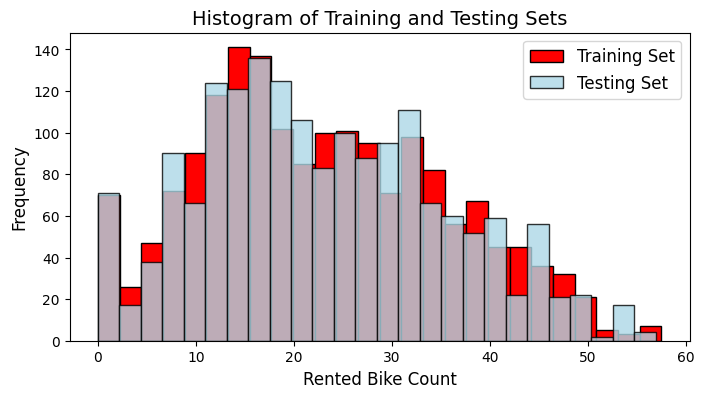

In [ ]:
#Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(Y_pred_decTreeGridSearch_test, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

plt.show()

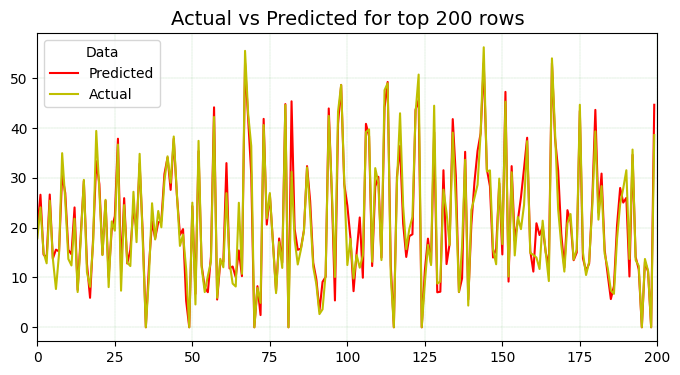

In [ ]:
plt.figure(figsize=(8,4))
plt.plot((Y_pred_decTreeGridSearch_test)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=14)

plt.show()

(-5.0, 60.0)

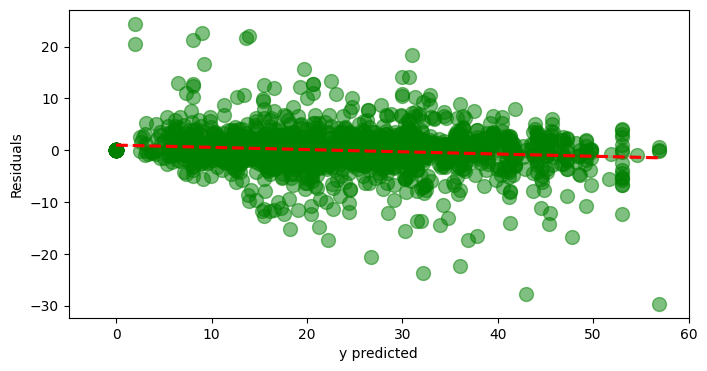

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=Y_pred_decTreeGridSearch_test,y=y_test-Y_pred_decTreeGridSearch_test,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
plt.xlim([-5,60])

## Random forest regression model

In [ ]:
# training model

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=50, num=10)], 
         'max_depth' : [20,30,40],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }


gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,y_test)
r2_randomforest_test = best_randomForest.score(X_test,y_test)

In [ ]:
best_param_gridSearch_RandomForest=gridSearch_RandomForest.best_params_
best_param_gridSearch_RandomForest

{'bootstrap': True,
 'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 36}

In [ ]:
# Predicting the Train set results
Y_pred_RndmfrstGridSearch_train = gridSearch_RandomForest.predict(X_train)

# Predicting the Test set results
Y_pred_RndmfrstGridSearch_test = gridSearch_RandomForest.predict(X_test)

**Matrix evaluation for training data**

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, Y_pred_RndmfrstGridSearch_train)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,Y_pred_RndmfrstGridSearch_train)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,Y_pred_RndmfrstGridSearch_train)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.9913651527540716
Mean Absolute Error (MAE): 0.7127000602334399
Mean Squred Error(MSE): 1.3326429391019403
Root Mean Squared Error(RMSE): 1.1544015501990372


In [ ]:
train_dict={'data': "Train data",
            'Model':"RandomForest with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
              }

In [ ]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data                                    Model       MAE        MSE  \
0  Train data                        Linear Regression  5.350277  48.856508   
1  Train data                         Ridge Regression  5.348744  48.798673   
2  Train data                         Lasso Regression  5.712600  55.224300   
3  Train data                  Ridge with GridSearchCV  5.347851  48.798108   
4  Train data                  Lasso with GridSearchCV  5.350006  48.801700   
5  Train data                    Polynomial Regression  3.999980  29.634245   
6  Train data                               ElasticNet  6.627505  72.684259   
7  Train data  DecisionTreeRegressor with GridSearchCV  0.611058   1.527372   
8  Train data           RandomForest with GridSearchCV  0.712700   1.332643   

       RMSE  R2_score  
0  6.989743  0.683435  
1  6.985605  0.683809  
2  7.431300  0.642200  
3  6.985564  0.683813  
4  6.985821  0.683790  
5  5.443734  0.807985  
6  8.525506  0.529043  
7  1.235869  0.990103  
8  1.154402  0.991365

**Matrix evaluation for test data**

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, Y_pred_RndmfrstGridSearch_test)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,Y_pred_RndmfrstGridSearch_test)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,Y_pred_RndmfrstGridSearch_test)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.9396018322087561
Mean Absolute Error (MAE): 1.9543119462338396
Mean Squred Error(MSE): 9.51188138581779
Root Mean Squared Error(RMSE): 3.0841338145122354


In [ ]:
# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"RandomForest with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }
			 

In [ ]:
			 
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

data                                    Model       MAE        MSE  \
0  Test data                        Linear Regression  5.383963  49.442282   
1  Test data                         Ridge Regression  5.389100  49.435100   
2  Test data                         Lasso Regression  5.853700  57.318700   
3  Test data                  Ridge with GridSearchCV  5.387832  49.418520   
4  Test data                  Lasso with GridSearchCV  5.391017  49.457952   
5  Test data                    Polynomial Regression  4.306284  35.506260   
6  Test data                               ElasticNet  6.871428  77.552835   
7  Test data  DecisionTreeRegressor with GridSearchCV  2.507963  16.625616   
8  Test data           RandomForest with GridSearchCV  1.954312   9.511881   

       RMSE  R2_score  
0  7.031521  0.686053  
1  7.031000  0.686100  
2  7.570900  0.636000  
3  7.029831  0.686204  
4  7.032635  0.685954  
5  5.958713  0.774544  
6  8.806409  0.507558  
7  4.077452  0.894431  
8  3.084134  0.939602

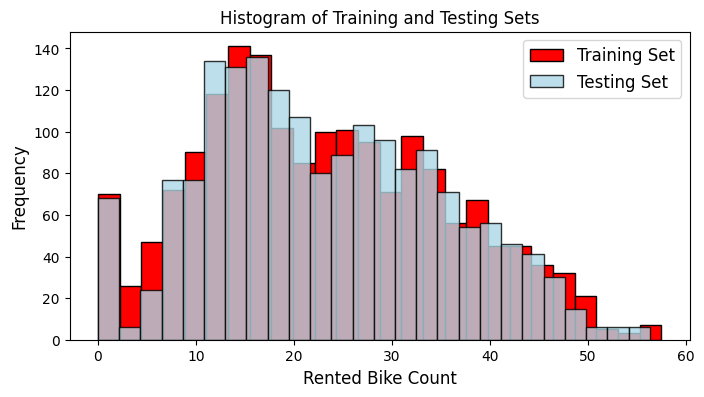

In [ ]:
# Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(Y_pred_RndmfrstGridSearch_test, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=12)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

plt.show()

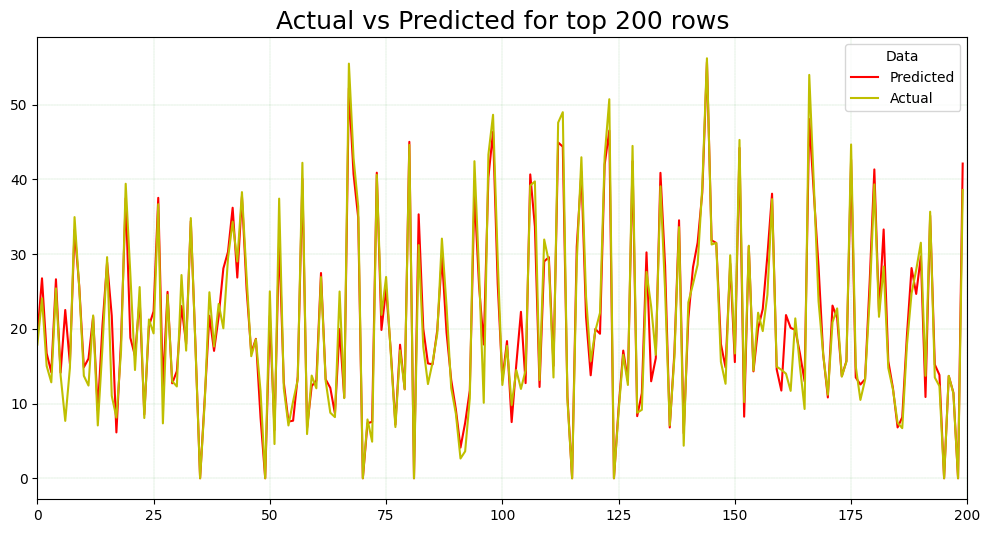

In [ ]:
plt.figure(figsize=(12,6))
plt.plot((Y_pred_RndmfrstGridSearch_test)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()

(-5.0, 60.0)

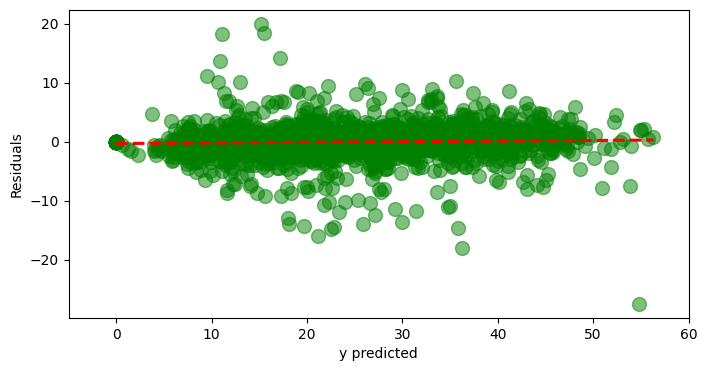

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=Y_pred_RndmfrstGridSearch_test,y=y_test-Y_pred_RndmfrstGridSearch_test,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
plt.xlim([-5,60])

## Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GradBoostAlgo=GradientBoostingRegressor()
GradBoostAlgo.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Predicting the Train set results
Y_pred_GradBoostAlgo_train = GradBoostAlgo.predict(X_train)

# Predicting the Test set results
Y_pred_GradBoostAlgo_test = GradBoostAlgo.predict(X_test)

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, Y_pred_GradBoostAlgo_train)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,Y_pred_GradBoostAlgo_train)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,Y_pred_GradBoostAlgo_train)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.9019257872722833
Mean Absolute Error (MAE): 2.7914021028972713
Mean Squred Error(MSE): 15.136099502072996
Root Mean Squared Error(RMSE): 3.8905140408528274


In [ ]:
train_dict={'data': "Train data",
            'Model':"Gradient Boosting",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
              }

# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data                                    Model       MAE        MSE  \
0  Train data                        Linear Regression  5.350277  48.856508   
1  Train data                         Ridge Regression  5.348744  48.798673   
2  Train data                         Lasso Regression  5.712600  55.224300   
3  Train data                  Ridge with GridSearchCV  5.347851  48.798108   
4  Train data                  Lasso with GridSearchCV  5.350006  48.801700   
5  Train data                    Polynomial Regression  3.999980  29.634245   
6  Train data                               ElasticNet  6.627505  72.684259   
7  Train data  DecisionTreeRegressor with GridSearchCV  0.611058   1.527372   
8  Train data           RandomForest with GridSearchCV  0.712700   1.332643   
9  Train data                        Gradient Boosting  2.791402  15.136100   

       RMSE  R2_score  
0  6.989743  0.683435  
1  6.985605  0.683809  
2  7.431300  0.642200  
3  6.985564  0.683813  
4  6.985821  0.683790  
5  5.443734  0.807985  
6  8.525506  0.529043  
7  1.235869  0.990103  
8  1.154402  0.991365  
9  3.890514  0.901926

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, Y_pred_GradBoostAlgo_test)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,Y_pred_GradBoostAlgo_test)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,Y_pred_GradBoostAlgo_test)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.8902866058568669
Mean Absolute Error (MAE): 2.971141496627749
Mean Squred Error(MSE): 17.27835180583491
Root Mean Squared Error(RMSE): 4.15672368649095


In [ ]:
# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"Gradient Boosting",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df             

data                                    Model       MAE        MSE  \
0  Test data                        Linear Regression  5.383963  49.442282   
1  Test data                         Ridge Regression  5.389100  49.435100   
2  Test data                         Lasso Regression  5.853700  57.318700   
3  Test data                  Ridge with GridSearchCV  5.387832  49.418520   
4  Test data                  Lasso with GridSearchCV  5.391017  49.457952   
5  Test data                    Polynomial Regression  4.306284  35.506260   
6  Test data                               ElasticNet  6.871428  77.552835   
7  Test data  DecisionTreeRegressor with GridSearchCV  2.507963  16.625616   
8  Test data           RandomForest with GridSearchCV  1.954312   9.511881   
9  Test data                        Gradient Boosting  2.971141  17.278352   

       RMSE  R2_score  
0  7.031521  0.686053  
1  7.031000  0.686100  
2  7.570900  0.636000  
3  7.029831  0.686204  
4  7.032635  0.685954  
5  5.958713  0.774544  
6  8.806409  0.507558  
7  4.077452  0.894431  
8  3.084134  0.939602  
9  4.156724  0.890287

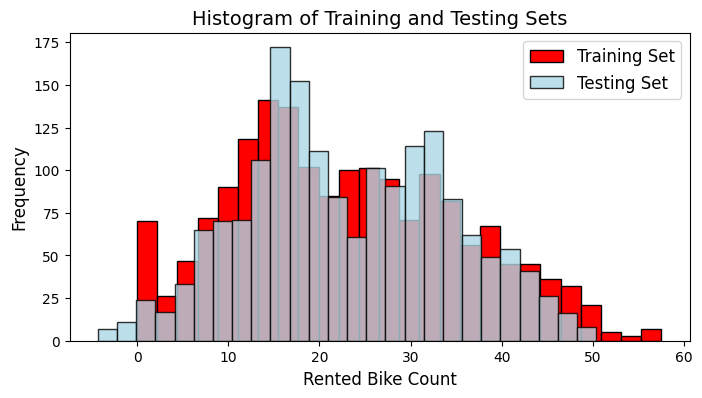

In [ ]:
# Histograms of y_test and of y_pred
fig = plt.figure(figsize=(8,4))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(Y_pred_GradBoostAlgo_test, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

plt.show()

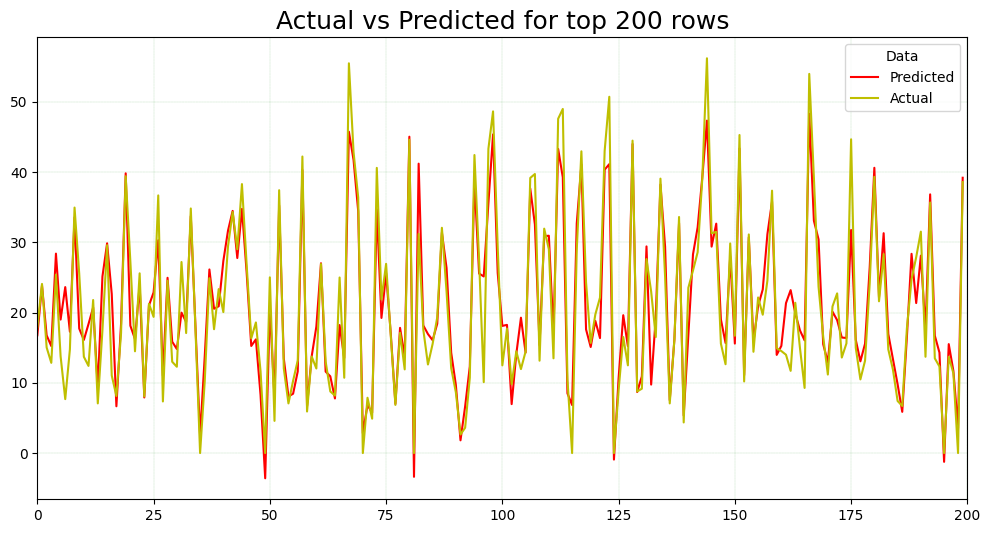

In [ ]:
plt.figure(figsize=(12,6))
plt.plot((Y_pred_GradBoostAlgo_test)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()	 


Text(0.5, 0, 'y predicted')

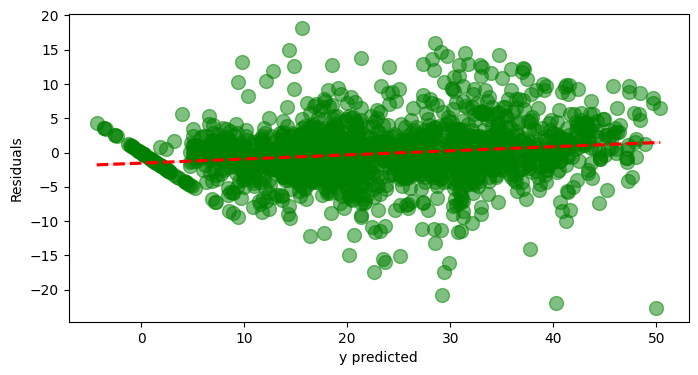

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=Y_pred_GradBoostAlgo_test,y=y_test-Y_pred_GradBoostAlgo_test,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)
plt.ylabel('Residuals')
plt.xlabel('y predicted')
# plt.xlim([-10,50])

In [ ]:
GradBoostAlgo.score(X_train,y_train)

0.9019257872722833

## Gradient Boosting with GridSearchCV

In [ ]:
GradBoostAlgo=GradientBoostingRegressor()
parameters = {'learning_rate': [0.02,0.03,0.04,0.05,0.06],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [6,8,10,12]
                 }
GradBoost_GridSearchCV=GridSearchCV(GradBoostAlgo,param_grid=parameters,cv=5,n_jobs=1)


In [ ]:
GradBoost_GridSearchCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.02, 0.03, 0.04, 0.05, 0.06],
                         'max_depth': [6, 8, 10, 12],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
GradBoost_GridSearchCV.score(X_train,y_train)

0.9912488718150195

In [ ]:
best_param_GradBoost_GridSearchCV=GradBoost_GridSearchCV.best_params_
best_param_GradBoost_GridSearchCV

{'learning_rate': 0.06, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9}

In [ ]:
# Predicting the Train set results
Y_pred_GradBoost_GridSearchCV_train = GradBoost_GridSearchCV.predict(X_train)

# Predicting the Test set results
Y_pred_GradBoost_GridSearchCV_test = GradBoost_GridSearchCV.predict(X_test)

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, Y_pred_GradBoost_GridSearchCV_train)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,Y_pred_GradBoost_GridSearchCV_train)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,Y_pred_GradBoost_GridSearchCV_train)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.9912488718150195
Mean Absolute Error (MAE): 0.8042016511428358
Mean Squred Error(MSE): 1.3505889395309507
Root Mean Squared Error(RMSE): 1.1621484154491417


In [ ]:
train_dict={'data': "Train data",
            'Model':"Gradient Boosting with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
              }

# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

data                                    Model       MAE        MSE  \
0   Train data                        Linear Regression  5.350277  48.856508   
1   Train data                         Ridge Regression  5.348744  48.798673   
2   Train data                         Lasso Regression  5.712600  55.224300   
3   Train data                  Ridge with GridSearchCV  5.347851  48.798108   
4   Train data                  Lasso with GridSearchCV  5.350006  48.801700   
5   Train data                    Polynomial Regression  3.999980  29.634245   
6   Train data                               ElasticNet  6.627505  72.684259   
7   Train data  DecisionTreeRegressor with GridSearchCV  0.611058   1.527372   
8   Train data           RandomForest with GridSearchCV  0.712700   1.332643   
9   Train data                        Gradient Boosting  2.791402  15.136100   
10  Train data      Gradient Boosting with GridSearchCV  0.804202   1.350589   

        RMSE  R2_score  
0   6.989743  0.683435  
1   6.985605  0.683809  
2   7.431300  0.642200  
3   6.985564  0.683813  
4   6.985821  0.683790  
5   5.443734  0.807985  
6   8.525506  0.529043  
7   1.235869  0.990103  
8   1.154402  0.991365  
9   3.890514  0.901926  
10  1.162148  0.991249

In [ ]:
# r2 score of test set
R2 = r2_score(y_test, Y_pred_GradBoost_GridSearchCV_test)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,Y_pred_GradBoost_GridSearchCV_test)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,Y_pred_GradBoost_GridSearchCV_test)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.9507925100761779
Mean Absolute Error (MAE): 1.6856275660531768
Mean Squred Error(MSE): 7.74950341319915
Root Mean Squared Error(RMSE): 2.7837929903638936


In [ ]:
# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"Gradient Boosting with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df    

data                                    Model       MAE        MSE  \
0   Test data                        Linear Regression  5.383963  49.442282   
1   Test data                         Ridge Regression  5.389100  49.435100   
2   Test data                         Lasso Regression  5.853700  57.318700   
3   Test data                  Ridge with GridSearchCV  5.387832  49.418520   
4   Test data                  Lasso with GridSearchCV  5.391017  49.457952   
5   Test data                    Polynomial Regression  4.306284  35.506260   
6   Test data                               ElasticNet  6.871428  77.552835   
7   Test data  DecisionTreeRegressor with GridSearchCV  2.507963  16.625616   
8   Test data           RandomForest with GridSearchCV  1.954312   9.511881   
9   Test data                        Gradient Boosting  2.971141  17.278352   
10  Test data      Gradient Boosting with GridSearchCV  1.685628   7.749503   

        RMSE  R2_score  
0   7.031521  0.686053  
1   7.031000  0.686100  
2   7.570900  0.636000  
3   7.029831  0.686204  
4   7.032635  0.685954  
5   5.958713  0.774544  
6   8.806409  0.507558  
7   4.077452  0.894431  
8   3.084134  0.939602  
9   4.156724  0.890287  
10  2.783793  0.950793

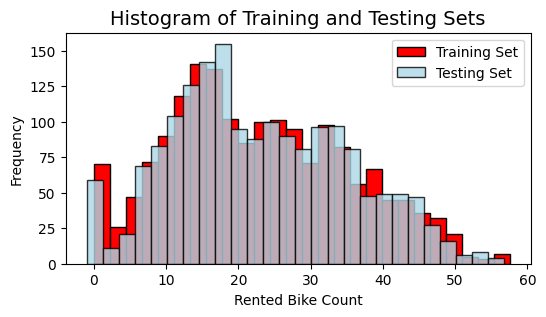

In [ ]:
# Histograms of y_test and of y_pred
fig = plt.figure(figsize=(6,3))

plt.hist(y_test, bins=26, edgecolor='black',color='red', label='Training Set')
plt.hist(Y_pred_GradBoost_GridSearchCV_test, bins=26, edgecolor='black', alpha= 0.8, color='lightblue', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=10)

plt.show()

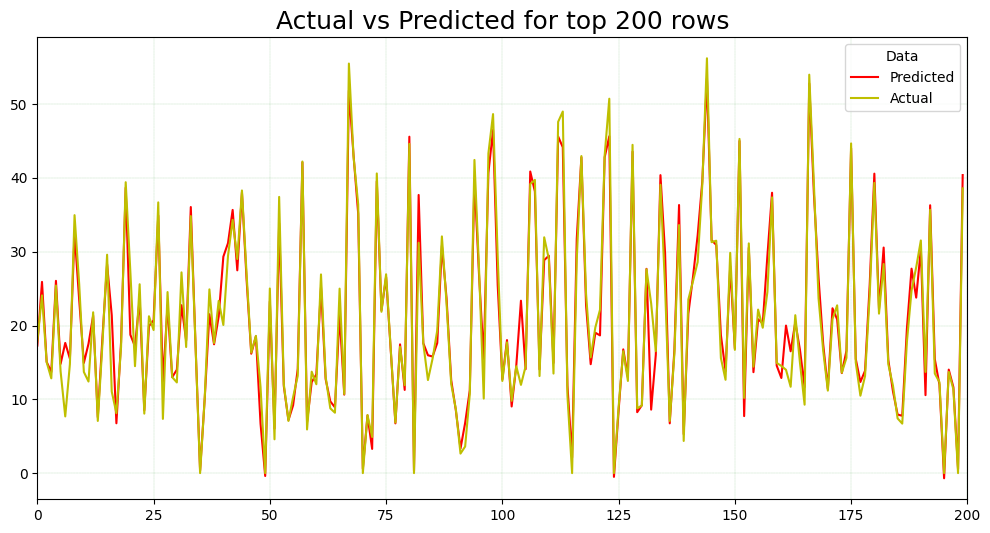

In [ ]:
plt.figure(figsize=(12,6))
plt.plot((Y_pred_GradBoost_GridSearchCV_test)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='y')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()


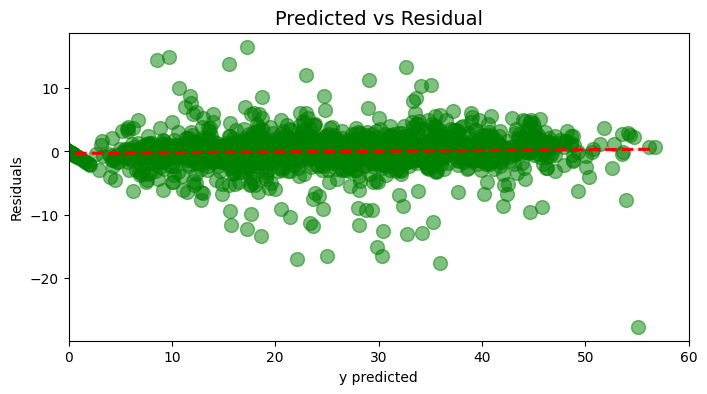

In [ ]:
plt.figure(figsize=(8,4))
sns.regplot(x=Y_pred_GradBoost_GridSearchCV_test,y=y_test-Y_pred_GradBoost_GridSearchCV_test,line_kws=dict(color='red',linestyle='--')
           ,scatter_kws=dict(s=100,color='green',alpha=0.5),ci=60)

# setting axis label
plt.xlabel('y predicted')
plt.ylabel('Residuals')

#setting up x acis range
plt.xlim([0,60])

# setting up title
plt.title('Predicted vs Residual',fontsize=14)

plt.show()

## Conclusions

In [ ]:
# Check Final dataframe of All models
final_score=pd.concat([traing_results_df,test_results_df]).sort_index(ascending=True)
final_score



data                                    Model       MAE        MSE  \
0   Train data                        Linear Regression  5.350277  48.856508   
0    Test data                        Linear Regression  5.383963  49.442282   
1   Train data                         Ridge Regression  5.348744  48.798673   
1    Test data                         Ridge Regression  5.389100  49.435100   
2   Train data                         Lasso Regression  5.712600  55.224300   
2    Test data                         Lasso Regression  5.853700  57.318700   
3   Train data                  Ridge with GridSearchCV  5.347851  48.798108   
3    Test data                  Ridge with GridSearchCV  5.387832  49.418520   
4   Train data                  Lasso with GridSearchCV  5.350006  48.801700   
4    Test data                  Lasso with GridSearchCV  5.391017  49.457952   
5   Train data                    Polynomial Regression  3.999980  29.634245   
5    Test data                    Polynomial Regression  4.306284  35.506260   
6   Train data                               ElasticNet  6.627505  72.684259   
6    Test data                               ElasticNet  6.871428  77.552835   
7   Train data  DecisionTreeRegressor with GridSearchCV  0.611058   1.527372   
7    Test data  DecisionTreeRegressor with GridSearchCV  2.507963  16.625616   
8    Test data           RandomForest with GridSearchCV  1.954312   9.511881   
8   Train data           RandomForest with GridSearchCV  0.712700   1.332643   
9    Test data                        Gradient Boosting  2.971141  17.278352   
9   Train data                        Gradient Boosting  2.791402  15.136100   
10  Train data      Gradient Boosting with GridSearchCV  0.804202   1.350589   
10   Test data      Gradient Boosting with GridSearchCV  1.685628   7.749503   

        RMSE  R2_score  
0   6.989743  0.683435  
0   7.031521  0.686053  
1   6.985605  0.683809  
1   7.031000  0.686100  
2   7.431300  0.642200  
2   7.570900  0.636000  
3   6.985564  0.683813  
3   7.029831  0.686204  
4   6.985821  0.683790  
4   7.032635  0.685954  
5   5.443734  0.807985  
5   5.958713  0.774544  
6   8.525506  0.529043  
6   8.806409  0.507558  
7   1.235869  0.990103  
7   4.077452  0.894431  
8   3.084134  0.939602  
8   1.154402  0.991365  
9   4.156724  0.890287  
9   3.890514  0.901926  
10  1.162148  0.991249  
10  2.783793  0.950793

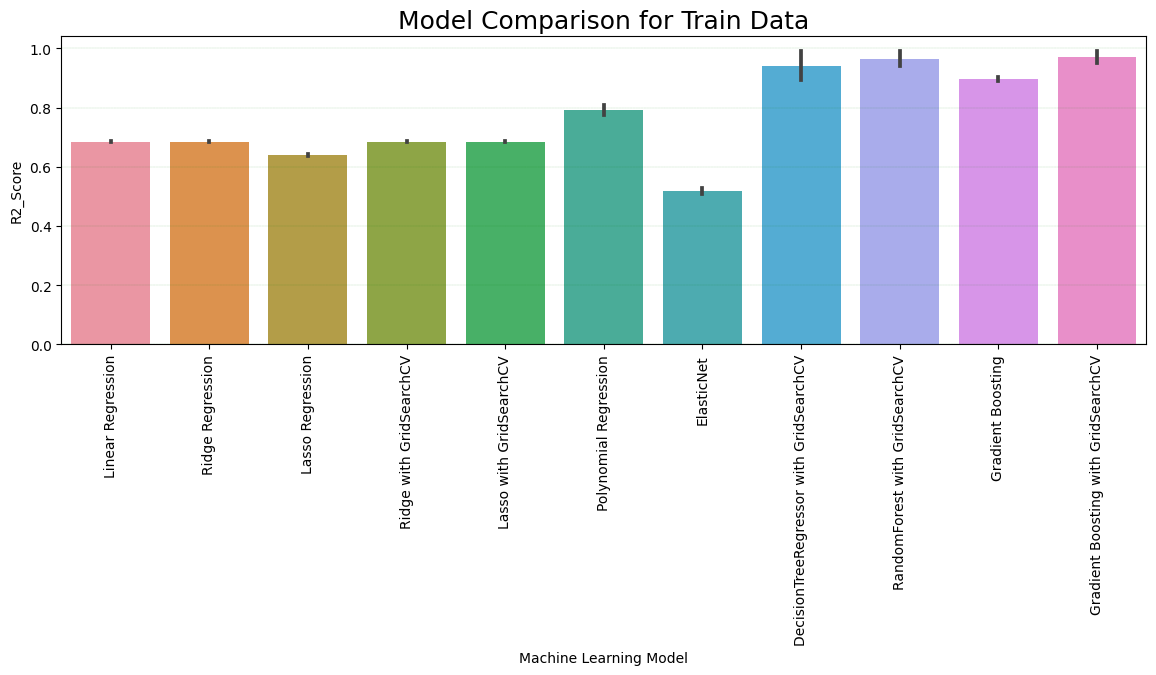

In [ ]:
# Draw line plot of total_bill and tip
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x = final_score['Model'], y = final_score["R2_score"], data = traing_results_df)
# sns.barplot(x = final_score['Model'], y = final_score["R2_score"], data = test_results_df)
plt.xticks(rotation=90)
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Model Comparison for Train Data',fontsize=18)

# setting up x and y label
plt.xlabel("Machine Learning Model")
plt.ylabel("R2_Score")
plt.show()

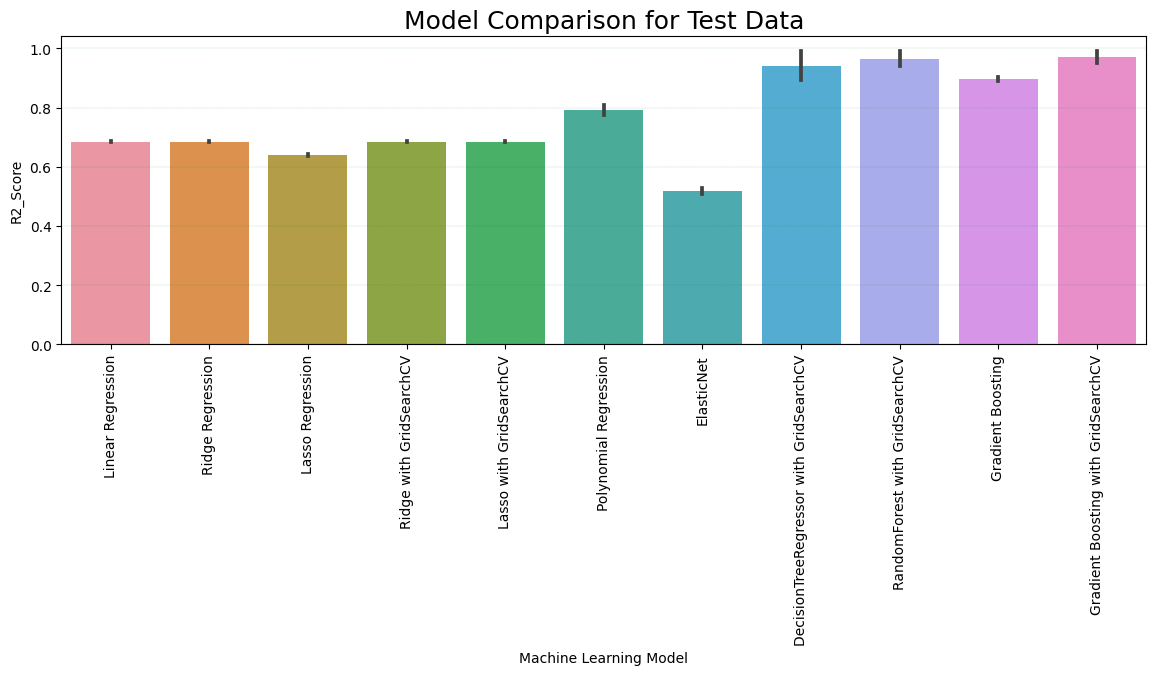

In [ ]:
# Draw line plot of total_bill and tip
plt.figure(figsize=(14,4),dpi=100)
# sns.barplot(x = final_score['Model'], y = final_score["R2_score"], data = traing_results_df)
sns.barplot(x = final_score['Model'], y = final_score["R2_score"], data = test_results_df)
plt.xticks(rotation=90)
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Model Comparison for Test Data',fontsize=18)

# setting up x and y label
plt.xlabel("Machine Learning Model")
plt.ylabel("R2_Score")
plt.show()

In [ ]:
columns=list(enumerate(final_score.columns[2:]))
(columns)


[(0, 'MAE'), (1, 'MSE'), (2, 'RMSE'), (3, 'R2_score')]

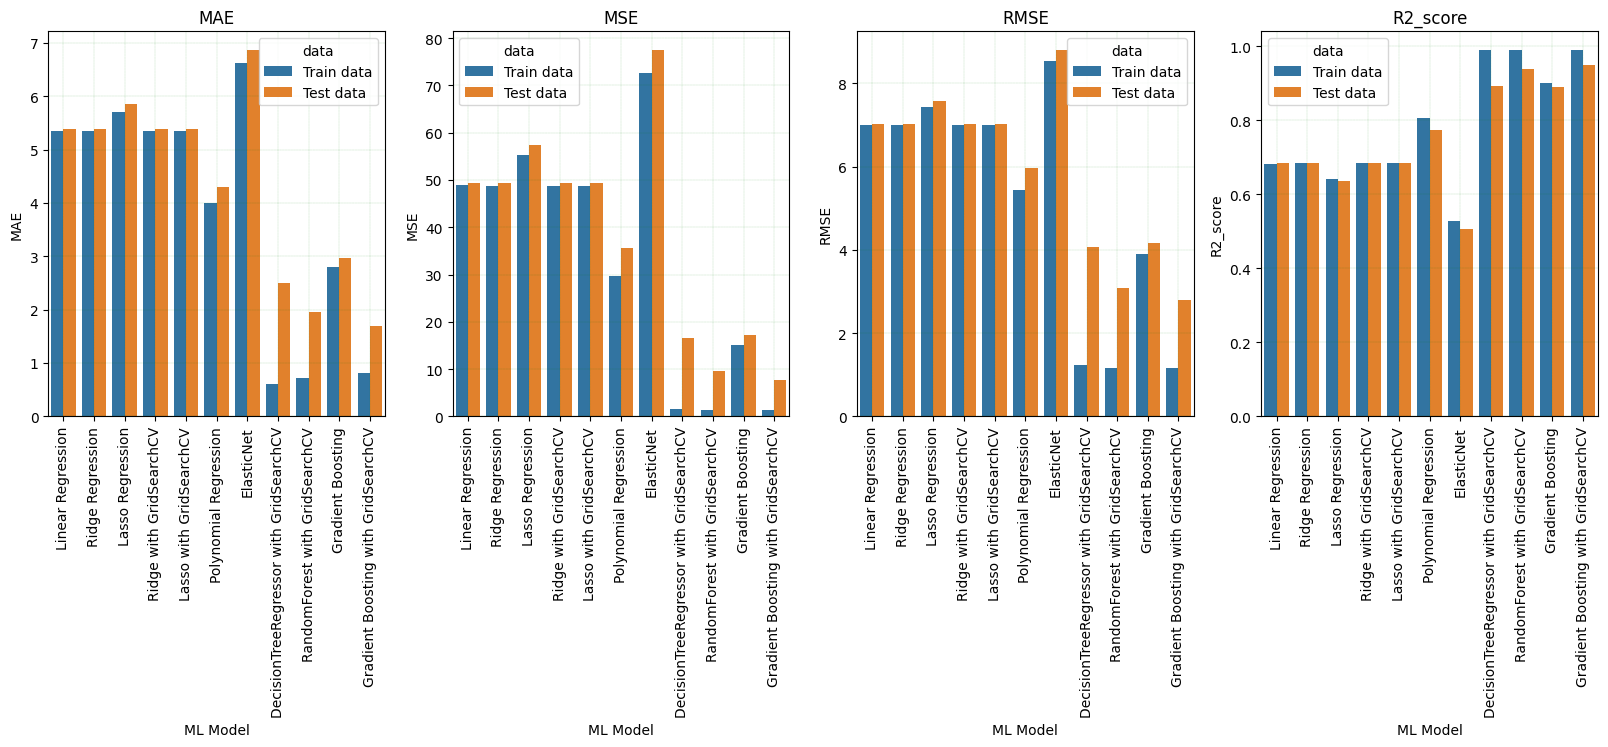

In [ ]:

count=1
plt.subplots(figsize=(20, 5))
for cols in columns:
    plt.subplot(1,4,cols[0]+1)
    sns.barplot(x = 'Model', y = cols[1], hue = 'data', data = final_score )
    plt.xticks(rotation=90)
    plt.title(cols[1])
    plt.xlabel("ML Model")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)
plt.show()

Elastic net model understand data properly hence show very poor performance with data.

linear regression and lasso and ridge with or without hyperparameter tuning shows very poor performance with the data (all having almost same R2_score)

By using polynomial regression with degree 2, R2_score improve to 0.8 for train data and 0.77 for test data.Model performance is improved as compare to earlier model.

By using DecisionTreeRegressor with GridSearchCV, training R2_score is 0.99
and for test data R2_score is 0.89. Model performance is improved but slightly increase in overfitting.

By using RandomForest with GridSearchCV, training R2_score is 0.93 and test R2_score is 0.99. Model is slightly underfitting.

By using Gradient Boosting	without hyperparameter tuning training R2_score 0.89 and test R2_score is 0.90, model is generalized very well.

By using Gradient Boosting with GridSearchCV training R2_score is 0.99
and test R2_score is 0.95 model performance is improved with a accuracy of 0.95.

